<a href="https://colab.research.google.com/github/preetikhullbe/Bike-sharing-demand/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online retail customer segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Understanding Customer Segmentation**
Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other. The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.

Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.



# **Why segment your customers?**
customer segmentation has a lot of potential benefits. It helps a company to develop an effective strategy for targeting its customers. This has a direct impact on the entire product development cycle, the budget management practices, and the plan for delivering targeted promotional content to customers. For example, a company can make a high-end product, a budget product, or a cheap alternative product, depending upon whether the product is intended for its most high yield customers, frequent purchasers or for the low-value customer segment. It may also fine-tune the features of the product for fulfilling the specific needs of its customers.

Customer segmentation can also help a company to understand how its customers are alike, what is important to them, and what is not. Often such information can be used to develop personalized relevant content for different customer bases. Many studies have found that customers appreciate such individual attention and are more likely to respond and buy the product. They also come to respect the brand and feel connected with it. This is likely to give the company a big advantage over its competitors. In a world where everyone has hundreds of emails, push notifications, messages, and ads dropping into their content stream, no one has time for irrelevant content.

Finally, this technique can also be used by companies to test the pricing of their different products, improve customer service, and upsell and cross-sell other products or services

# **GitHub Link -**

https://github.com/preetikhullbe/Online-retail-customer-segmentatiion

# **Problem Statement**



In this project, task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

# **How to segment your customers?**
To start with customer segmentation, a company needs to have a clear vision and a goal in mind. The following steps can be undertaken to find segments in the customer base on a broad level.

**Analyze the existing customer pool**: Understanding the geographical distribution, customer preferences/beliefs, reviewing website search page analytics, etc.

**Develop an understanding of each customer**: Mapping each customer to a set of preferences to understand and predict their behavior: the products, services, and content they would be interested in.

**Define segment opportunities**: Once the segments have been defined, there should a proper business understanding of each segment and its challenges and opportunities. The entire company’s marketing strategy can be branched out to cater to different niches of customers.

**Research the segment**: After cementing the definition and business relevance of different customer segments, a company needs to understand how to modify its products or services to better cater to them. For example, it may decide to provide higher discounts to some customers compared to others to expand its active customer base.

**Tweak strategy**: Experiment with new strategies and understand the impact of time and economy on the purchasing behavior of customers in different segments. And then the process should be repeated for refining the strategy as much as possible.

# **Let's Begin !**

In the following analysis, I am going to use the Online Retail Data Set. The data contains information about transnational transactions for a UK-based and registered non-store online retail.
Our goal in this Notebook is to cluster our customers to get insights in:

Increasing revenue (Knowing customers who present most of our revenue)

**Increasing customer retention**

**Discovering Trends and patterns**

**Defining customers at risk**

## **1. Know Your Data**


### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.

### **Importing some important Libraries**

In [353]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from numpy import math
from sklearn.preprocessing import StandardScaler
# Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [354]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Dataset Loading**

In [355]:
# Load Dataset
# read Excel file with Panda Dataframe
cust_seg_df=pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

### **Dataset First View**

In [356]:
# Dataset First Look
# first 10 rows and columns of data set
cust_seg_df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [357]:
# last 5 rows and columns of data set
cust_seg_df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### **Dataset Rows & Columns count**

In [358]:
# Dataset Rows & Columns count
# Shape of Data set in the form of rows and columns
cust_seg_df.shape

(541909, 8)

we have 541909 records for 8 columns.

### **Dataset Information**

In [359]:
# # Check Information of data set
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [360]:
# Check Description of data set
cust_seg_df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# **Unique value**

In [361]:
# Let's Check Number of Unique values for each column
for col in ["InvoiceNo","StockCode","InvoiceDate","CustomerID", "Country"]:
    print("Unique Values for ", col, " - ", cust_seg_df[col].nunique())

Unique Values for  InvoiceNo  -  25900
Unique Values for  StockCode  -  4070
Unique Values for  InvoiceDate  -  23260
Unique Values for  CustomerID  -  4372
Unique Values for  Country  -  38


## **Duplicate Values**

In [362]:
# Check duplicate values Present in data set
len(cust_seg_df[cust_seg_df.duplicated()])

5268

In [363]:
print("Shape before dropping duplicates", cust_seg_df.shape)
cust_seg_df = cust_seg_df.drop_duplicates()
print("Shape after dropping duplicates", cust_seg_df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (536641, 8)


## **Missing Values/Null Values**

In [364]:
# Missing Values/Null Values Count
cust_seg_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [365]:
# Missing Value Count Function
def show_missing():
    missing = cust_seg_df.columns[cust_seg_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(cust_seg_df)*100,2))

Missing Data Count
CustomerID     135037
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     25.16
Description     0.27
dtype: float64


### **From above we can see that Description 0.27% and Customer Id have 25.16% null values**


Text(0.5, 1.0, ' Visulaizing Missing Values')

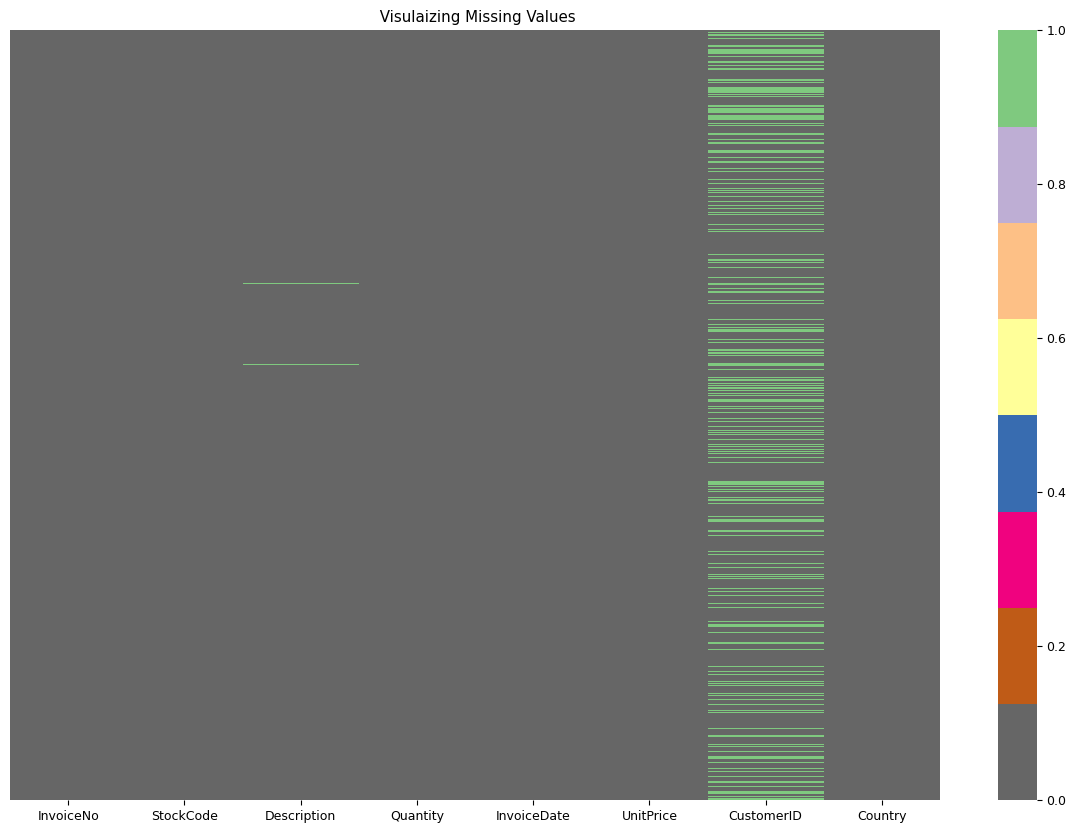

In [366]:
# Visualizing the missing valuesprint
plt.figure(figsize=(15,10))
sns.heatmap(cust_seg_df.isnull(),cmap='Accent_r',annot=False,yticklabels=False)
plt.title(" Visulaizing Missing Values")

## Check if InvoiceNo for Null Customer ID exist in cases where Customer ID is present for filling CustomerID Nulls

In [367]:
cust_seg_df.dropna(inplace=True)

In [368]:
# So, Let's check null values after removing null values
cust_seg_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##Now, there are no null values

In [369]:
#checking dataset info
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [370]:
#DF's shape after dropping null values
cust_seg_df.shape

(401604, 8)

In [371]:
# Check duplicate values present in our data
cust_seg_df.duplicated().sum()

0

In [372]:
# Let's check Description of data set with another way
cust_seg_df.describe().T

count          mean          std      min       25%       50%  \
Quantity    401604.0     12.183273   250.283037 -80995.0      2.00      5.00   
UnitPrice   401604.0      3.474064    69.764035      0.0      1.25      1.95   
CustomerID  401604.0  15281.160818  1714.006089  12346.0  13939.00  15145.00   

                 75%      max  
Quantity       12.00  80995.0  
UnitPrice       3.75  38970.0  
CustomerID  16784.00  18287.0

## Here we can see that min values for Quantity and unitprice column are negative.UnitPrice can't be negative ,min unitprice could be 0
## Need to Explore these columns

## **Analysis of UnitPrice variable**

In [373]:
cust_seg_df["UnitPrice"].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

### **checking cases where Price <0**

In [374]:
cust_seg_df[cust_seg_df.UnitPrice==0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany  
33576  2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089  2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070  2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
56674  2011-01-13 15:10:00        0.0     15107.0  United Kingdom  
86789  2011-02-10 13:08:00        0.0     17560.0  United Kingdom  
130188 2011-03-23 10:25:00        0.0     13239.0  United Kingdom  
139453 2011-03-30 12:45:00        0.0     13113.0  United Kingdom  
145208 2011-04-04 14:42:00        0.0     14410.0  United Kingdom  
157042 2011-04-14 18:57:00        0.0     12457.0     Switzerland  
187613 2011-05-12 15:21:00       

### **Removing these two cases from the UnitPrice coumn**

In [375]:
cust_seg_df = cust_seg_df[cust_seg_df.UnitPrice >= 0]

In [376]:
#analysis Quantity column
cust_seg_df["Quantity"].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [377]:
# Let's check dataframe have negative values in quantity
cust_seg_df[cust_seg_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

### **here we can see the all the rows where value is negative for Quantity columnn ,InvoiceNo contain "C" .which means Cancellation.**

In [378]:
# Changing the datatype to str
cust_seg_df['InvoiceNo'] = cust_seg_df['InvoiceNo'].astype('str')

In [379]:
# String to be searched in start of string
search ="C"


# Boolean series returned with False at place of NaN
bool_series = cust_seg_df["InvoiceNo"].str.startswith(search, na=False)


# Displaying filtered dataframe
cancel_order = cust_seg_df[bool_series]

cancel_order.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [380]:
#printing percentage of cancel oreders
print(cancel_order['InvoiceNo'].count()*100/cust_seg_df['InvoiceNo'].count())

2.209141343213713


### **Now, Here we See that Invoice number starting with C has negative values and as per description of the data those are cancelations. so This shows that quantity is negative when any order was cancelled. Removed cancellations data since they only make upto ~2% of data.**

In [381]:
#Finding in which countries cancellation is high
#grouping with invoice no
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

Country  InvoiceNo
0  United Kingdom       7501
1         Germany        453
2            EIRE        247
3          France        148
4             USA        112
5       Australia         74
6           Spain         48
7           Italy         45
8         Belgium         38
9           Japan         37

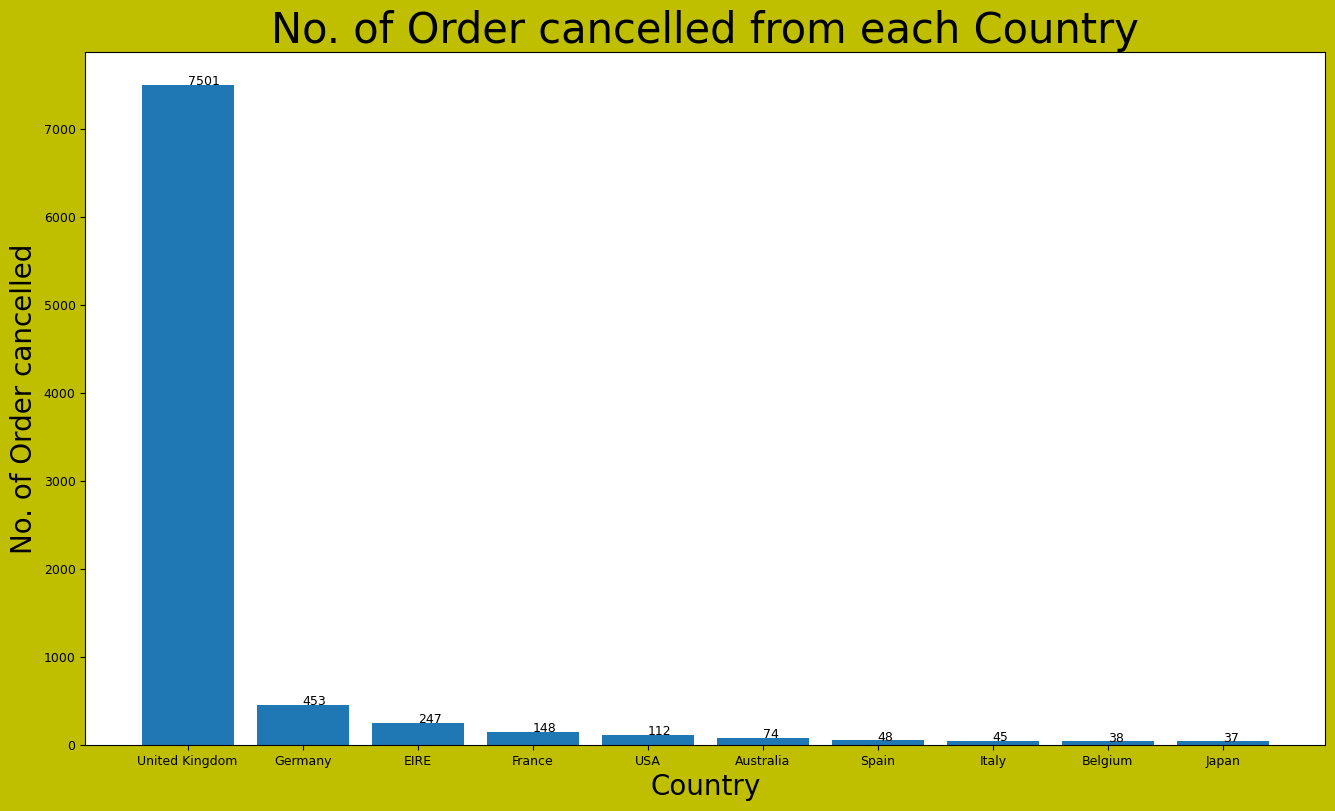

In [382]:
#figure size
plt.figure(figsize=(16,9),facecolor="y")

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# Creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [383]:
# Also If Invoice No starts with C means it's a cancellation. We need to drop this entries.
cust_seg_df=cust_seg_df[~cust_seg_df['InvoiceNo'].str.contains('C')]

In [384]:
# Let's  Check how many values are left where unitprice==0after dropping out the canceled orders
len(cust_seg_df[cust_seg_df['UnitPrice']==0])

40

**So we don't have any rows left where UnitPrice=0**

In [385]:
#let's recheck the description of numeri columns
cust_seg_df.describe().T

count          mean          std      min       25%       50%  \
Quantity    392732.0     13.153718   181.588420      1.0      2.00      6.00   
UnitPrice   392732.0      3.125596    22.240725      0.0      1.25      1.95   
CustomerID  392732.0  15287.734822  1713.567773  12346.0  13955.00  15150.00   

                 75%       max  
Quantity       12.00  80995.00  
UnitPrice       3.75   8142.75  
CustomerID  16791.00  18287.00

In [386]:
#checking shape of dataframe after doing all the cleaning
cust_seg_df.shape

(392732, 8)

## **Feature Engineering**

In [387]:
#printing values for a particular InvoiceDate
print(cust_seg_df[cust_seg_df['InvoiceDate']=='12/13/10 9:02'].index.values)

[26732 26733 26734 26735 26736 26737 26738 26739 26740 26741 26742 26743
 26744 26745 26746 26747 26748]


### **So for one InvoiceDate we have multiple values so for differentiate these values ,we will convert invoice date into day,month,year,hour and minutes.**

In [388]:
# Converting Invoice Date to datetime.
# Invoice Date is in format of 01-12-2010 08:26.
cust_seg_df["InvoiceDate"] = pd.to_datetime(cust_seg_df["InvoiceDate"], format="%m-%d-%Y %H:%M")

In [389]:
cust_seg_df["year"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.year)
cust_seg_df["month_num"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.month)
cust_seg_df["day_num"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.day)
cust_seg_df["hour"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.hour)
cust_seg_df["minute"] = cust_seg_df["InvoiceDate"].apply(lambda x: x.minute)

In [390]:
# Extracting month from the Invoice date
cust_seg_df['Month']=cust_seg_df['InvoiceDate'].dt.month_name()

In [391]:
# Extracting day from the Invoice date
cust_seg_df['Day']=cust_seg_df['InvoiceDate'].dt.day_name()

In [392]:
#how many years are there
cust_seg_df.year.unique()

array([2010, 2011])

### **so we have two years data (2010,2011)**

In [393]:
#first 5 records
cust_seg_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  
0        1     8      26  December  Wednesday  
1        1     8      26  December  Wednesday  
2        1     8      26  December  Wednesday  
3        1     8      26  December  Wednesday  
4        1     8      26  December  Wednesday

# **Calculate total transaction amount**
### **Compute the total value of transaction based on quantity sold and per unit price.**

In [394]:
# New feature : Amount
#we know that amount=Quantity*Unit price
cust_seg_df['Amount'] = cust_seg_df['Quantity']*cust_seg_df['UnitPrice']
rfm_m = cust_seg_df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

CustomerID    Amount
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

# **Exploratory Data Analysis**

## **1.Top 10 ordering countries**


In [395]:
# value count of countries
cust_seg_df.Country.value_counts().head(10)

United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: Country, dtype: int64

<Axes: >

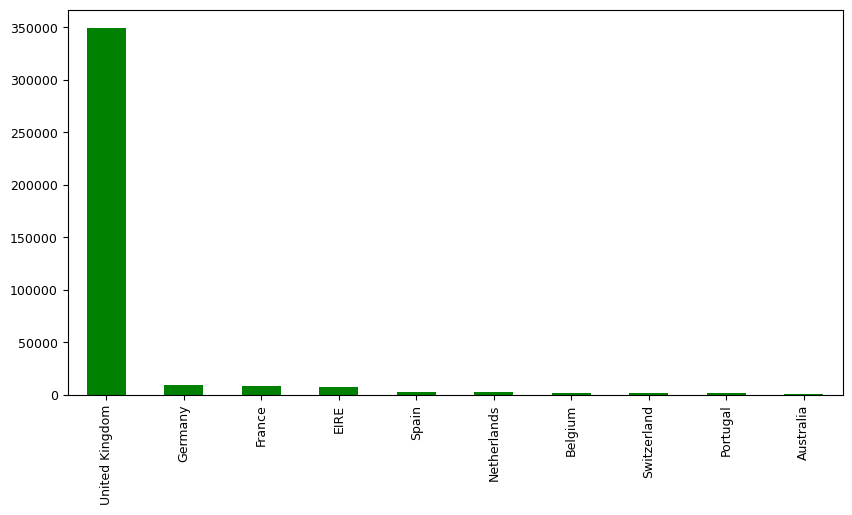

In [396]:
#plotting bar graph
cust_seg_df.Country.value_counts().head(10).plot.bar(figsize=(10,5),color='g')

### **Majority of customers resides in United Kingdom and After UK ,most customers are from Germany**

## **On which day, the sales are high**

<Axes: title={'center': 'Daily Sales'}, xlabel='Day', ylabel='Quantity'>

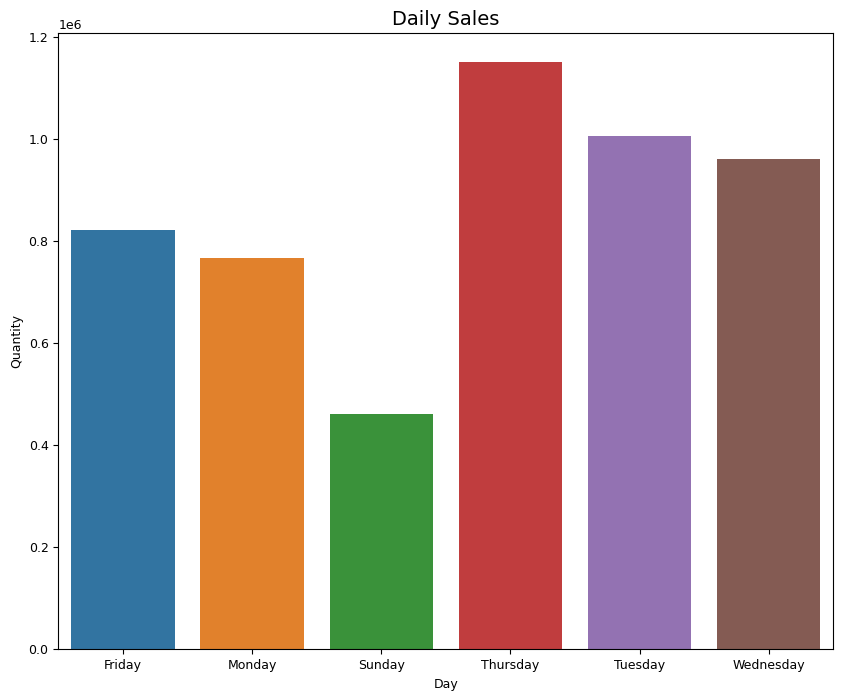

In [397]:
daily_sales = cust_seg_df[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(x=daily_sales.index, y=daily_sales['Quantity'])

### **Sales On Thursdays are high and least on sunday**

## **on which day number, the sales are high**

<Axes: title={'center': 'Sales on days '}, xlabel='day_num', ylabel='Quantity'>

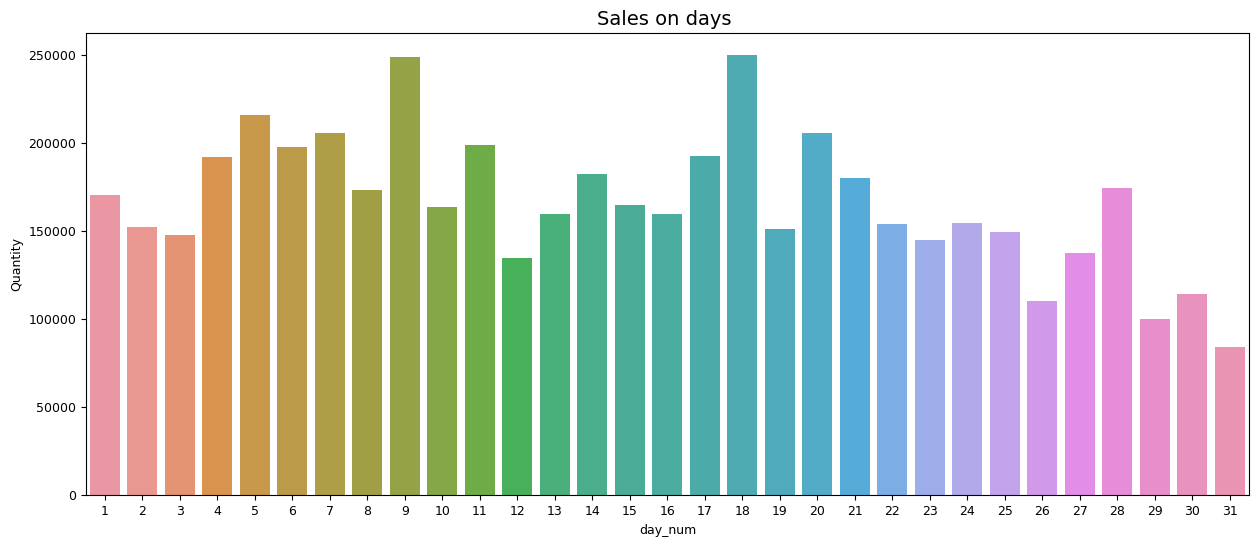

In [398]:
day_sales = cust_seg_df[['day_num', 'Quantity']].groupby('day_num').sum()
plt.figure(figsize=(15,6))
plt.title("Sales on days ", fontsize=14)
sns.barplot(x=day_sales.index,y=day_sales['Quantity'])

### **Sales on day 18 is the highest and on 31 is the lowest.**

## **Monthly sales**

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Quantity'>

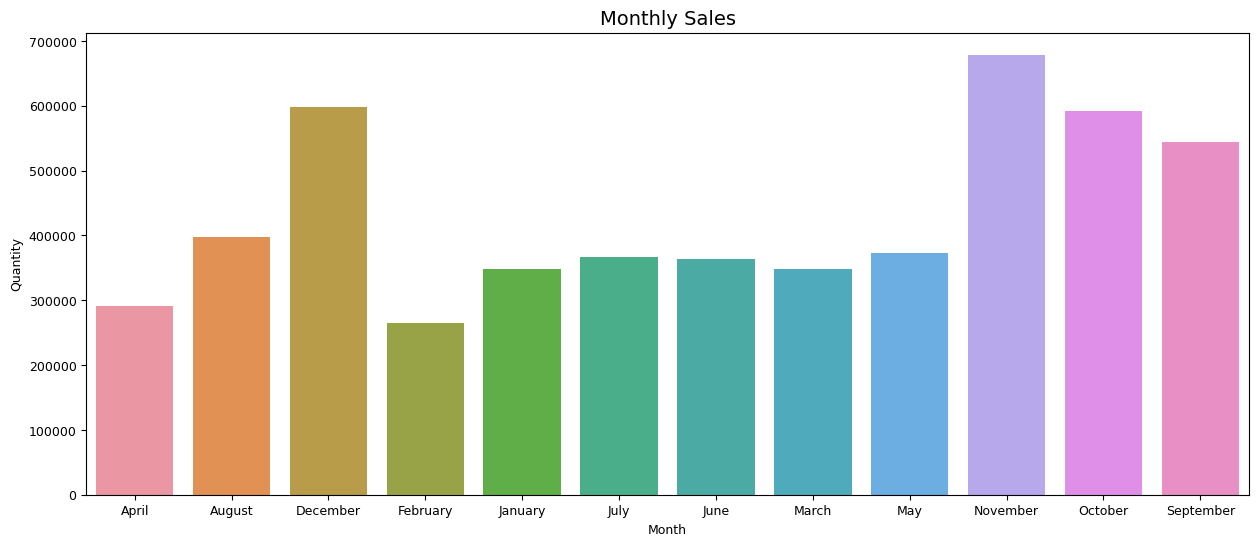

In [399]:
monthly_sales = cust_seg_df[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(15,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(x=monthly_sales.index, y=monthly_sales['Quantity'])

### **Most of the sales happened in November,December and September month (Christmas festive sales) and February Month had least sales**

## **Top product based on description**

In [400]:
# Let's check Top 5 products using value_counts on Description feature
top_5_product=cust_seg_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'})
top_5_product.head()

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

In [401]:
# Let's check bottom 5 products
top_5_product.tail(5)

Product_name  Count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

Text(0.5, 1.0, 'Top 5 products')

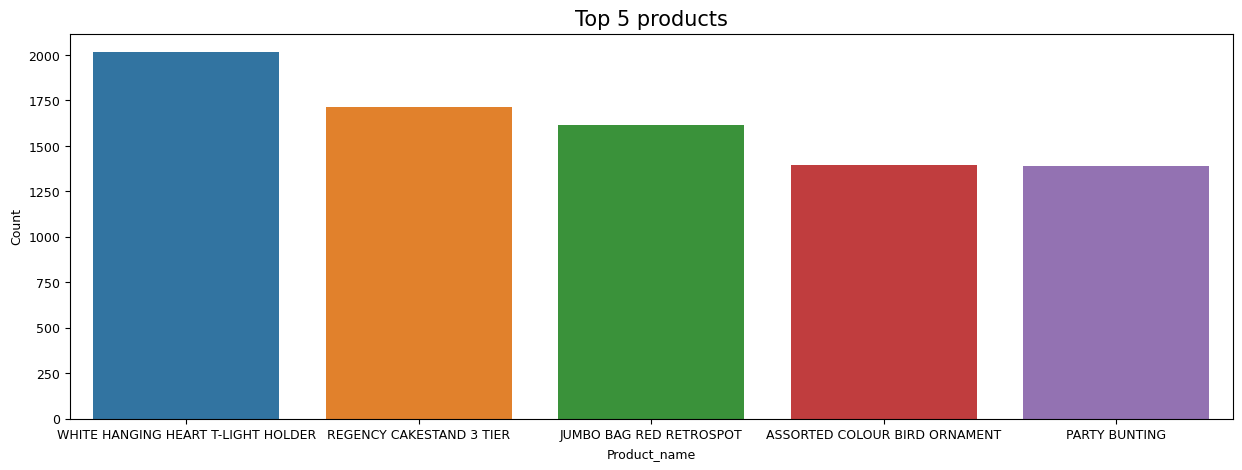

In [402]:
# Now, plotting Top 5 product in terms of description
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_5_product['Product_name'].head(),y=top_5_product['Count'])
plt.title('Top 5 products',fontsize='15')

### **so the most selling product is WHITE "HANGING HEART T-LIGHT HOLDER"**

## **least selling Five products**

Text(0.5, 1.0, 'bottom 5 products')

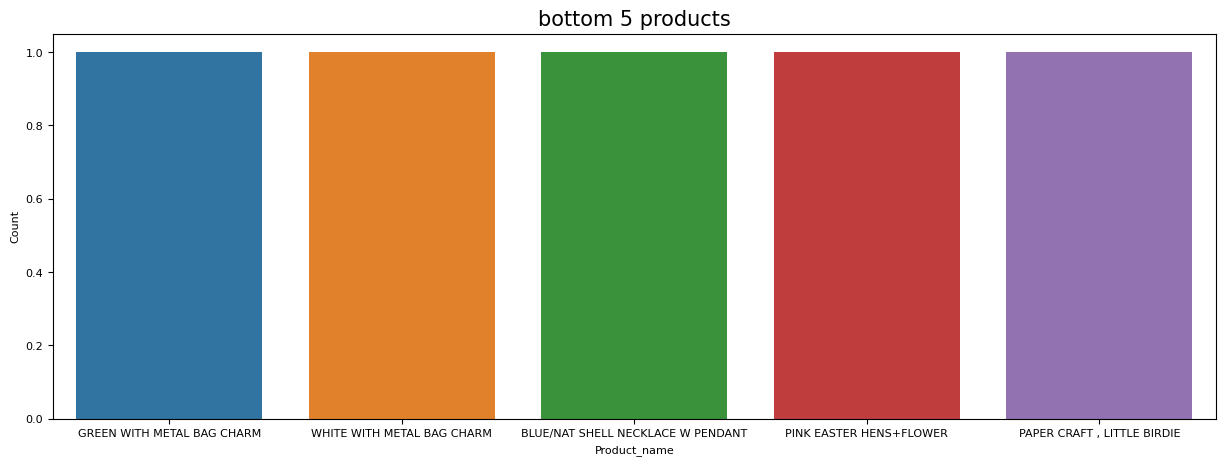

In [403]:
# five bottom product in terms of description
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '8'
sns.barplot(x=top_5_product['Product_name'].tail(),y=top_5_product['Count'])
plt.title('bottom 5 products',fontsize='15')

following products are the least selling

1.Green with Metal Bag Charm

2.White with Metal Bag Charm

3.Blue/Net Shell Necklace W Pendant

4.Pink Easter Hens+ Flower

5.Paper Craft, Little Birdie

## **Top five itmes in terms of STOCK CODE**

In [404]:
#get top 5 stock code
top_5_StockCodes=cust_seg_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(5)
top_5_StockCodes

StockCode  Count
0    85123A   2023
1     22423   1714
2    85099B   1615
3     84879   1395
4     47566   1390

Text(0.5, 1.0, 'Top 5 products in terms of Stock Code')

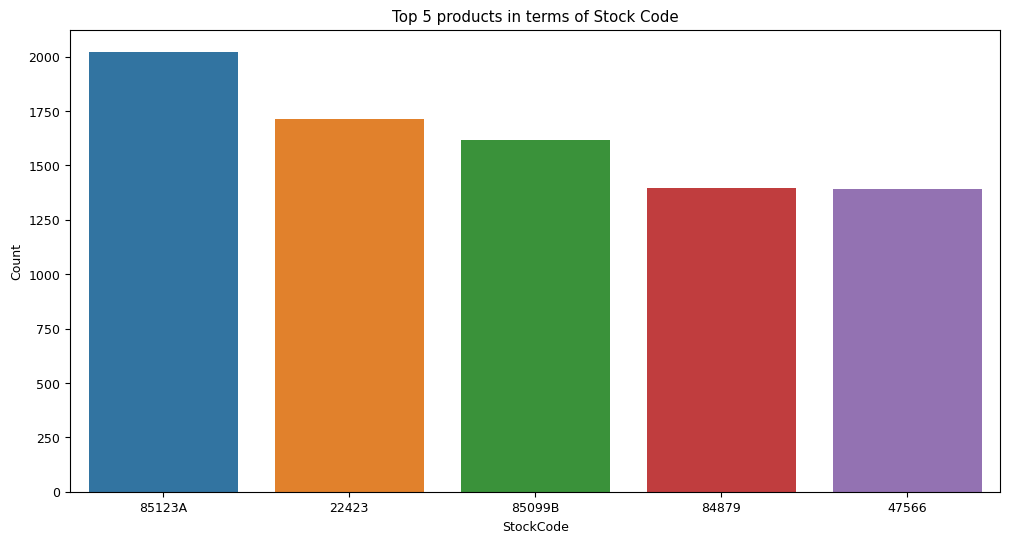

In [405]:
# Top 5 product in terms of Stcok Code
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_5_StockCodes['StockCode'],y=top_5_StockCodes['Count'])
plt.title('Top 5 products in terms of Stock Code')

## **Top Ten customer who are more frequent**

In [406]:
top_10_customers=cust_seg_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Products_purchasing_Count
0     17841.0                       7676
1     14911.0                       5672
2     14096.0                       5111
3     12748.0                       4413
4     14606.0                       2677
5     15311.0                       2366
6     14646.0                       2080
7     13089.0                       1814
8     13263.0                       1667
9     14298.0                       1637

Text(0.5, 1.0, 'Top 10 frequent Customers.')

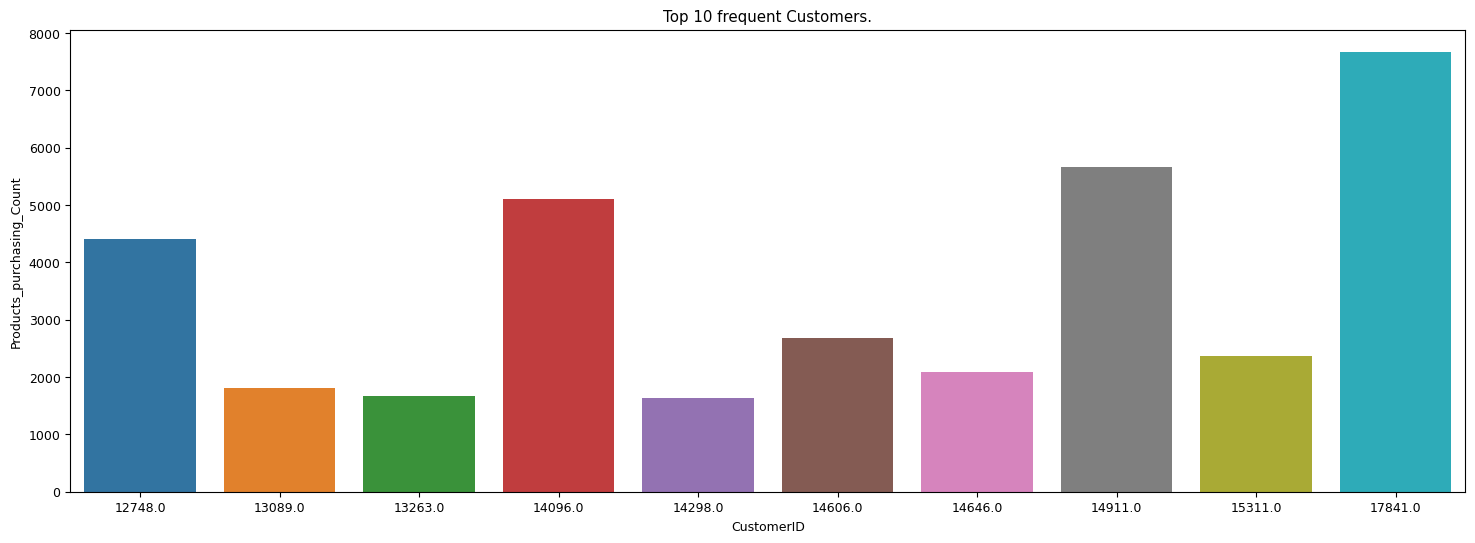

In [407]:
# Top Ten frequent Customers
plt.figure(figsize=(18,6))
plt.rcParams['font.size'] = '9'
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

### **CustomerID- 17841 had purchased highest number of products and CustomerID-14911 is the 2nd higest customer who purchased the most the products.**

## **Average amount spent by customers**

In [408]:
avg_amount=cust_seg_df.groupby('CustomerID')['Amount'].mean().reset_index().rename(columns={'Amount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
avg_amount.head()

CustomerID  Avg_amount_per_customer
0        12346.0                 77183.60
3009     16446.0                 56157.50
2012     15098.0                 13305.50
2503     15749.0                  4453.43
2088     15195.0                  3861.00

Text(0.5, 1.0, 'Average amount spent by each Customer')

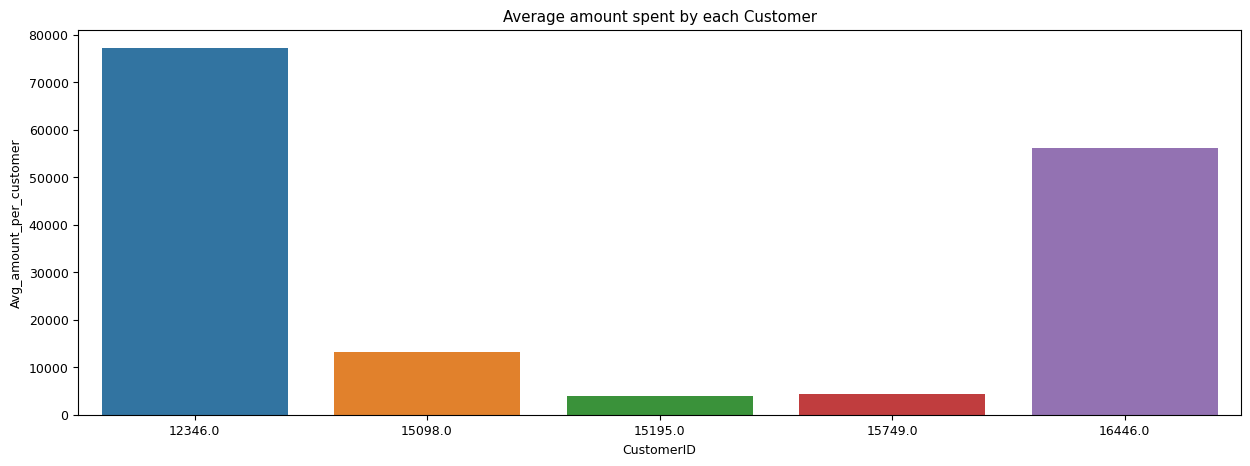

In [409]:
# Sales count on different days.
plt.figure(figsize=(15,5))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(5))
plt.title('Average amount spent by each Customer')

### **Customer ID 12346 spent 77183 Average amount which is is highest.**

In [410]:
cust_seg_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  Amount  
0        1     8      26  December  Wednesday   15.30  
1        1     8      26  December  Wednesday   20.34  
2        1     8      26  December  Wednesday   22.00  
3        1     8      26  December  Wednesday   20.34  
4        1     8      26  December  Wednesday   20.34

# **Data Preparation**

## We are going to analysis the Customers based on below 3 factors:

## **R (Recency)**: Number of days since last purchase

## **F (Frequency)**: Number of transactions

## **M (Monetary):** Total Amount of transactions (revenue contributed)
## **We will do RFM Analysis as a first step and then combine RFM with predictive algorithms (k-means).**

## **RFM Analysis answers these questions:**

## Who are our best customers?
## Who has the potential to be converted in more profitable customers?
## Which customers we must retain?
## Which group of customers is most likely to respond to our current campaign?

## Recency = Latest Date - Last Inovice Data,
## Frequency = count of invoice no. of transaction(s),
## Monetary = Sum of Total
## Amount for each customer

## **calculating Recency, Frequency and Monetary**

In [411]:
# Calculate latest date from data set.
# Recency = Latest Date - Last Inovice Data,
# Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total
# Amount for each customer

import datetime as dt

# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_dataframe = cust_seg_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Amount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [412]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [413]:
rfm_dataframe.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.041484    90.512100    2048.215924
std     100.007757   225.515328    8984.248352
min       0.000000     1.000000       0.000000
25%      17.000000    17.000000     306.455000
50%      50.000000    41.000000     668.560000
75%     141.500000    98.000000    1660.315000
max     373.000000  7676.000000  280206.020000

                ----------------- Distribution Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary', ylabel='Density'>

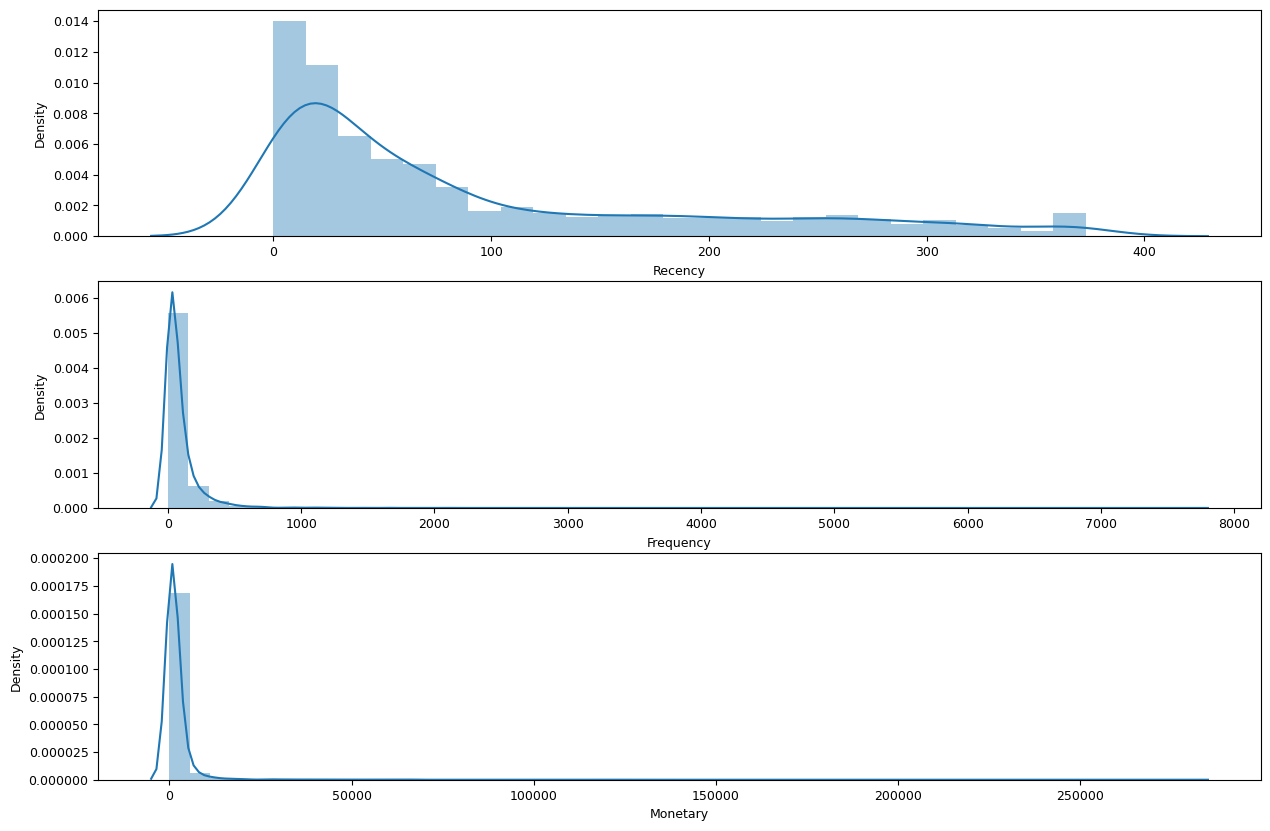

In [414]:
print("                ----------------- Distribution Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(15,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_dataframe['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_dataframe['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_dataframe['Monetary'])

## **Distribution of frequency and Monetary is highly skewed**

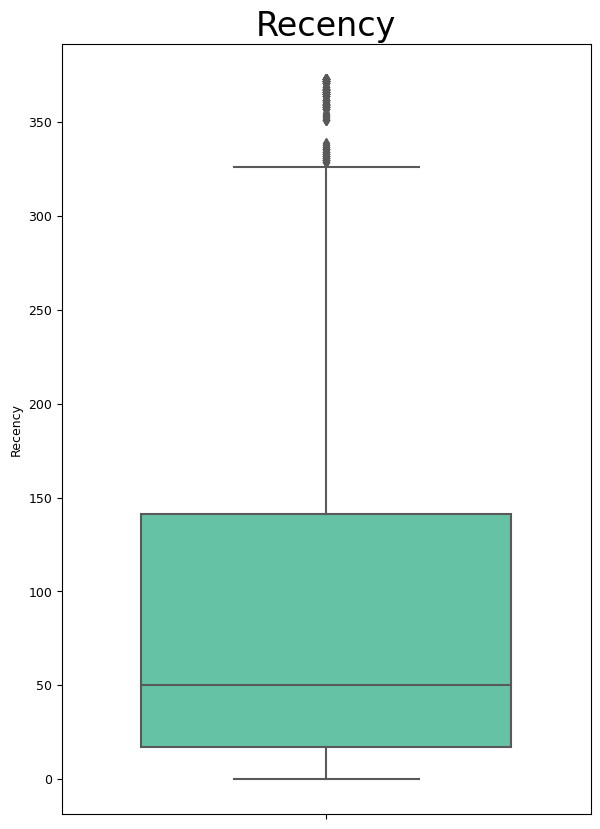

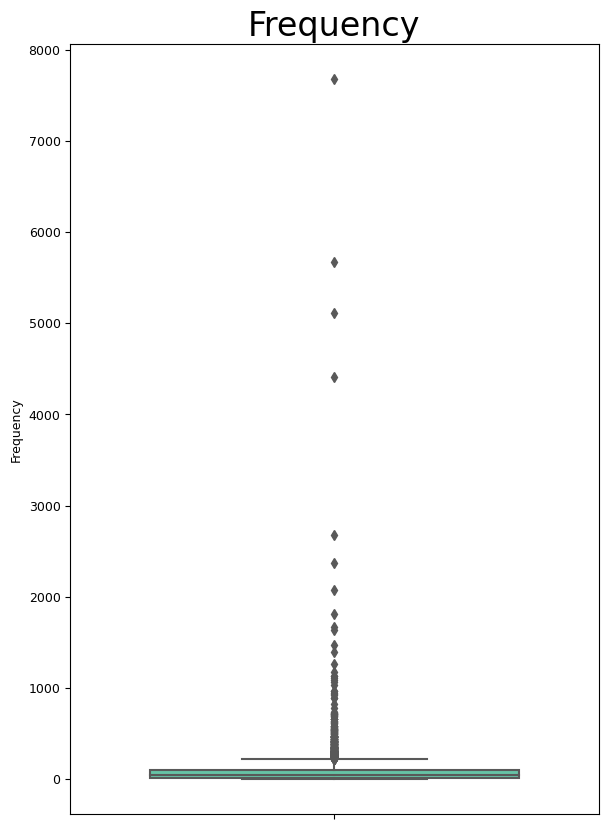

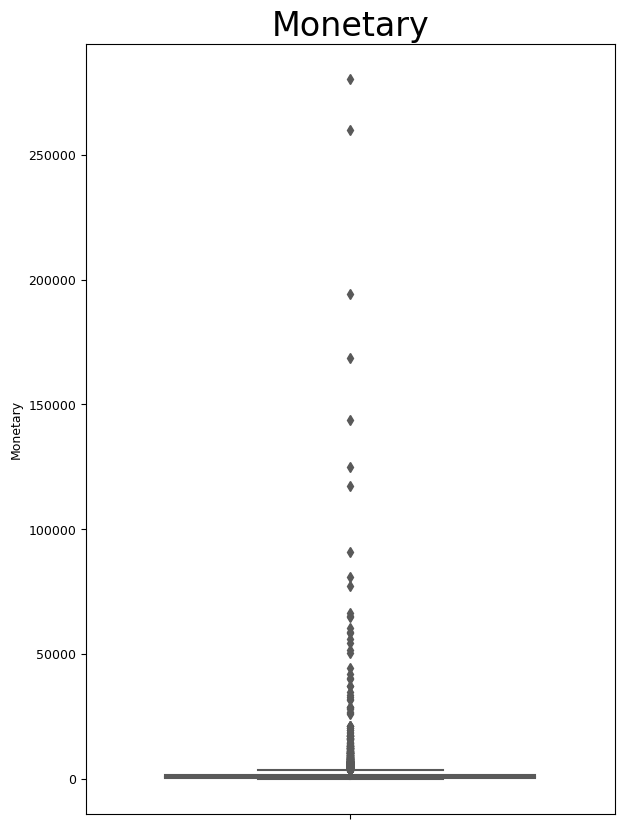

In [415]:
for var in rfm_dataframe :
    plt.rcParams['figure.figsize'] = [20,20]
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=rfm_dataframe[var],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)

## **Checking for outliers**

Text(0.5, 0, 'Attributes')

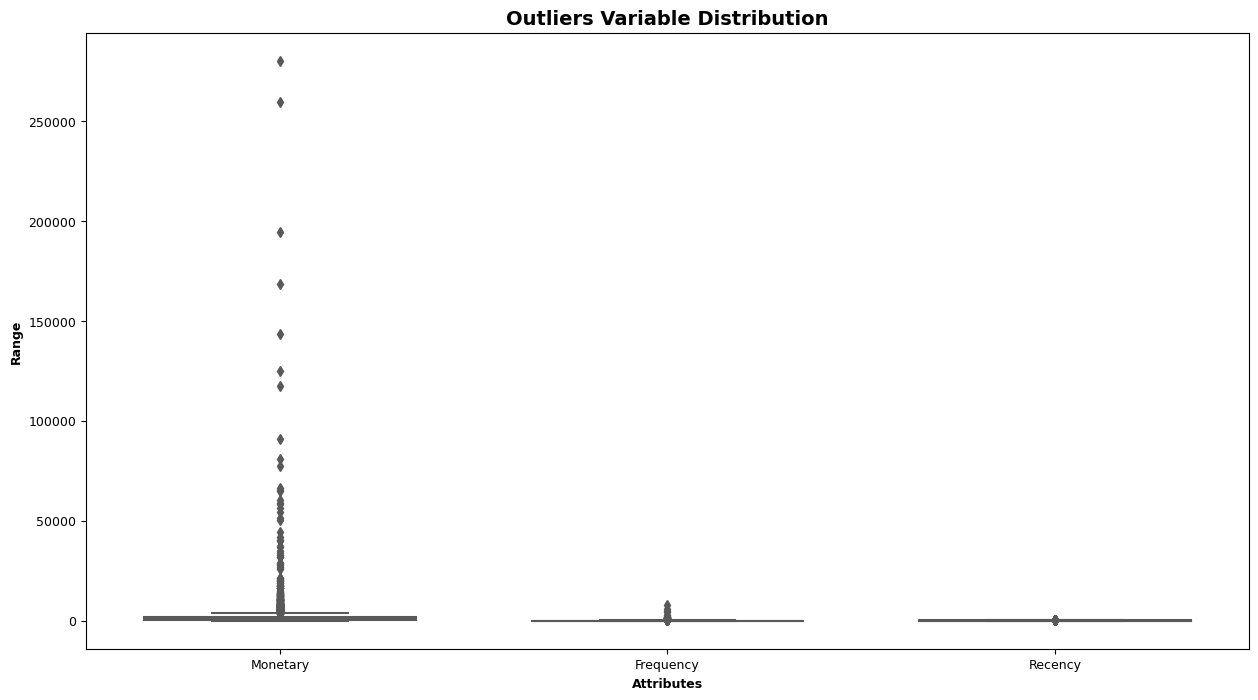

In [416]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(data = rfm_dataframe[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### **From above we can see that there are outlier in Recency, frequency and monetary , lets remove outlier**

In [417]:
# Removing (statistical) outliers
Q1 = rfm_dataframe.Monetary.quantile(0.05)
Q3 = rfm_dataframe.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Monetary >= Q1 - 1.5*IQR) & (rfm_dataframe.Monetary <= Q3 + 1.5*IQR)]


# Outlier treatment for Recency
Q1 = rfm_dataframe.Recency.quantile(0.05)
Q3 = rfm_dataframe.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Recency >= Q1 - 1.5*IQR) & (rfm_dataframe.Recency <= Q3 + 1.5*IQR)]

# Outlier treatment for Frequency
Q1 = rfm_dataframe.Frequency.quantile(0.05)
Q3 = rfm_dataframe.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Frequency >= Q1 - 1.5*IQR) & (rfm_dataframe.Frequency <= Q3 + 1.5*IQR)]

In [418]:
#statistical summary
rfm_dataframe.describe()

Recency    Frequency      Monetary
count  4258.000000  4258.000000   4258.000000
mean     93.468060    75.769610   1314.757185
std     100.197583    98.120899   1803.987160
min       0.000000     1.000000      0.000000
25%      18.000000    17.000000    302.610000
50%      52.000000    39.000000    652.770000
75%     145.000000    95.000000   1566.792500
max     373.000000   721.000000  14034.990000

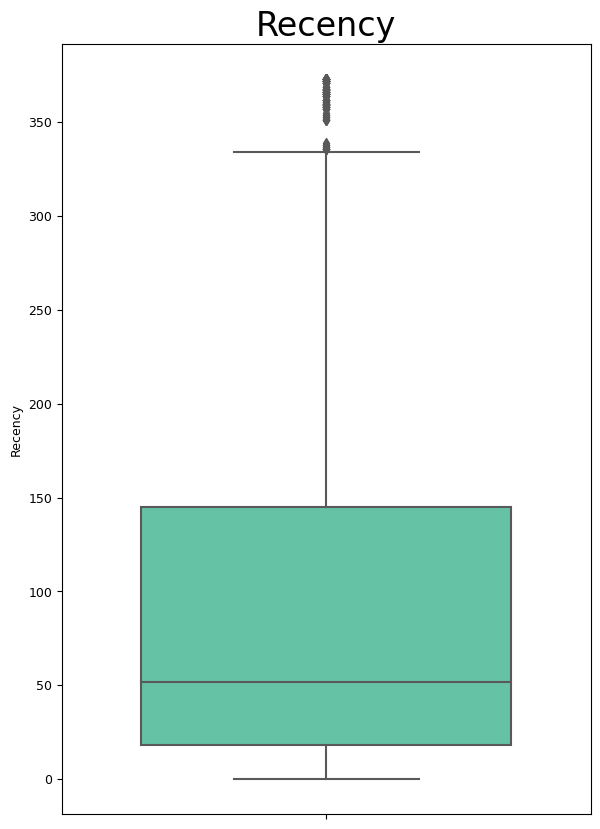

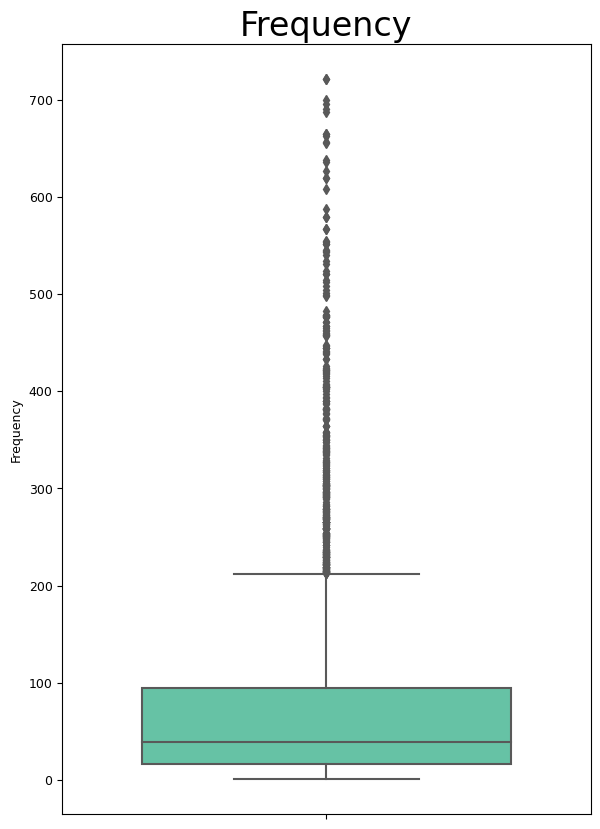

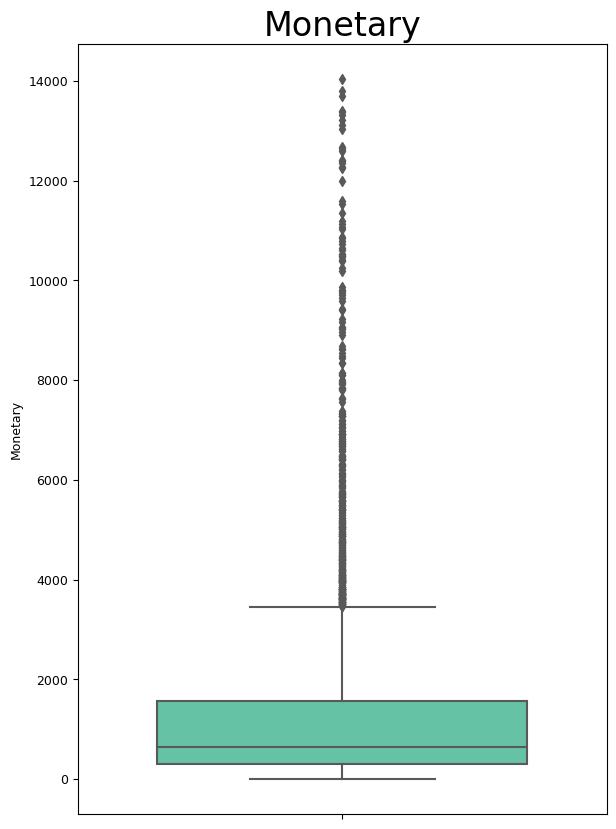

In [419]:
for var in rfm_dataframe :
    plt.rcParams['figure.figsize'] = [20,20]
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=rfm_dataframe[var],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)

                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary', ylabel='Density'>

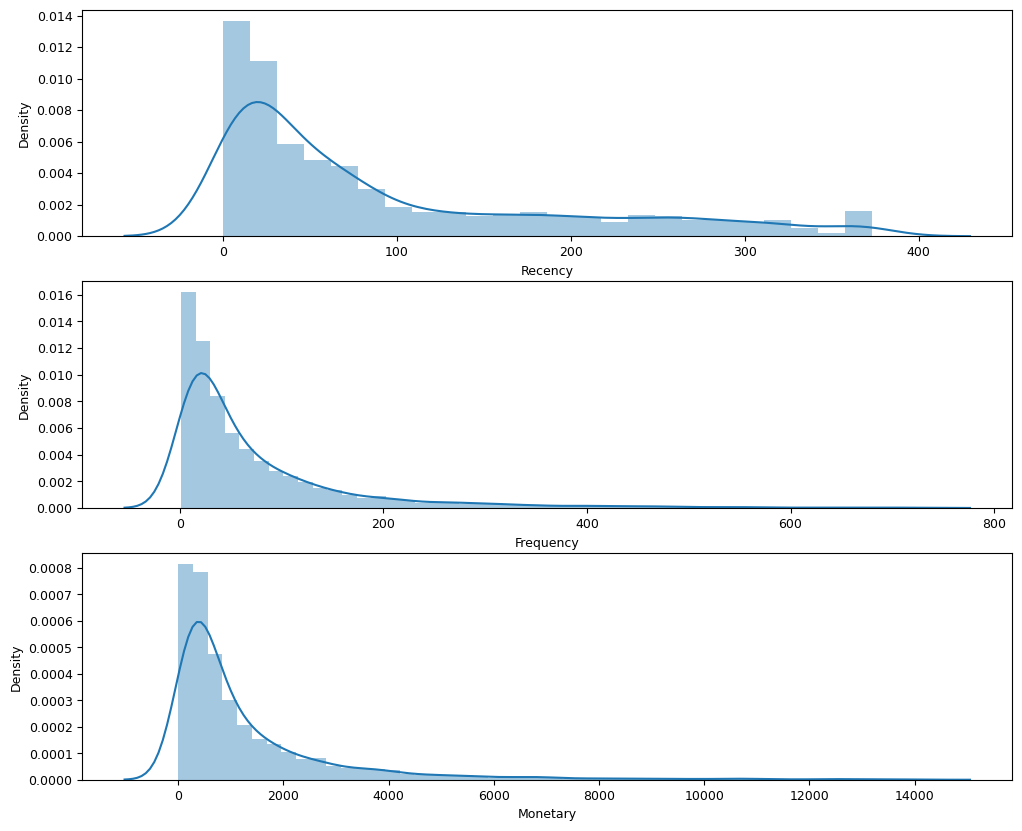

In [420]:
# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(rfm_dataframe['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(rfm_dataframe['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(rfm_dataframe['Monetary'])

In [421]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 145.0},
 'Frequency': {0.25: 17.0, 0.5: 39.0, 0.75: 95.0},
 'Monetary': {0.25: 302.60999999999996, 0.5: 652.77, 0.75: 1566.7924999999998}}

In [422]:
# 1)Converting quantiles to a dictionary, easier to use.

# 2)quantiles = quantiles.to_dict()

# 3)Functions to create R, F and M segments

# 4)arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

# 5)lower the recency, good for the company




def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [423]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  1  2  1
12350.0         310         17    334.40  4  4  3
12352.0          36         85   2506.04  2  2  1

In [424]:
# Let's  Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [425]:
# Now, Calculate and Add RFMScore value column showing total sum of RFM Group values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  1  2  1       121          4
12350.0         310         17    334.40  4  4  3       443         11
12352.0          36         85   2506.04  2  2  1       221          5

In [426]:
rfm_dataframe['RFM_Score'].unique()

array([ 3,  7,  4, 11,  5, 12,  8,  6,  9, 10])

# **Creating different categories baseed on customer RFM score**

In [427]:
# Assign batch to each customer
# Assign loyalty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12347.0        2        182   4310.00  1  1  1       111          3   
1     12348.0       75         31   1797.24  3  3  1       331          7   
2     12349.0       18         73   1757.55  1  2  1       121          4   
3     12350.0      310         17    334.40  4  4  3       443         11   
4     12352.0       36         85   2506.04  2  2  1       221          5   
5     12353.0      204          4     89.00  4  4  4       444         12   
6     12354.0      232         58   1079.40  4  2  2       422          8   
7     12355.0      214         13    459.40  4  4  3       443         11   
8     12356.0       22         59   2811.43  2  2  1       221          5   
9     12357.0       33        131   6207.67  2  1  1       211          4   

  RFM_Loyalty_Level  
0         Platinaum  
1              Gold  
2         Platinaum  
3             Bronz  
4         Platinaum  
5             Bronz  
6              Gold  
7             Bronz  
8         Platinaum  
9         Platinaum

In [428]:
# Validate the data For RFM group =121
rfm_dataframe[rfm_dataframe['RFM_Score'] == 6].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     16000.0        2          9  12393.70  1  4  1       141          6   
1     12939.0       64         47  11581.80  3  2  1       321          6   
2     13093.0      275        159   7832.47  4  1  1       411          6   
3     17396.0       39         27   7330.80  2  3  1       231          6   
4     12798.0       10          8   6977.04  1  4  1       141          6   
5     12830.0       37         38   6814.64  2  3  1       231          6   
6     16532.0       17          4   6748.80  1  4  1       141          6   
7     15939.0       89         76   6115.01  3  2  1       321          6   
8     17850.0      372        297   5391.21  4  1  1       411          6   
9     13802.0      138         60   4599.42  3  2  1       321          6   

  RFM_Loyalty_Level  
0              Gold  
1              Gold  
2              Gold  
3              Gold  
4              Gold  
5              Gold  
6              Gold  
7              Gold  
8              Gold  
9              Gold

In [429]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 4].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12540.0       19        478  13400.24  2  1  1       211          4   
1     12477.0       22        300  13219.74  2  1  1       211          4   
2     12536.0       43        261  12601.83  2  1  1       211          4   
3     17340.0       29        407  12353.29  2  1  1       211          4   
4     15125.0       25        127  11528.48  2  1  1       211          4   
5     17107.0       33        416  10797.48  2  1  1       211          4   
6     13340.0       45        134  10736.48  2  1  1       211          4   
7     17865.0       30        370  10526.32  2  1  1       211          4   
8     16843.0       42        378  10196.57  2  1  1       211          4   
9     12567.0       22        446   9401.28  2  1  1       211          4   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [430]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 5].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12557.0       16         33  11990.96  1  3  1       131          5   
1     12409.0       78        109  11072.67  3  1  1       311          5   
2     16180.0      100        162  10254.18  3  1  1       311          5   
3     16656.0       22         73   8625.80  2  2  1       221          5   
4     14952.0       59        138   8099.49  3  1  1       311          5   
5     13629.0       23         59   7792.36  2  2  1       221          5   
6     16745.0       86        355   7180.70  3  1  1       311          5   
7     13324.0       36         75   7121.95  2  2  1       221          5   
8     16652.0       58        118   6773.97  3  1  1       311          5   
9     13225.0        3         32   6463.84  1  3  1       131          5   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [431]:
# Validate the data For RFM group =421
rfm_dataframe[rfm_dataframe['RFM_Score'] == 6].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     16000.0        2          9  12393.70  1  4  1       141          6   
1     12939.0       64         47  11581.80  3  2  1       321          6   
2     13093.0      275        159   7832.47  4  1  1       411          6   
3     17396.0       39         27   7330.80  2  3  1       231          6   
4     12798.0       10          8   6977.04  1  4  1       141          6   
5     12830.0       37         38   6814.64  2  3  1       231          6   
6     16532.0       17          4   6748.80  1  4  1       141          6   
7     15939.0       89         76   6115.01  3  2  1       321          6   
8     17850.0      372        297   5391.21  4  1  1       411          6   
9     13802.0      138         60   4599.42  3  2  1       321          6   

  RFM_Loyalty_Level  
0              Gold  
1              Gold  
2              Gold  
3              Gold  
4              Gold  
5              Gold  
6              Gold  
7              Gold  
8              Gold  
9              Gold

In [432]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 7].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12590.0      211         68   9864.26  4  2  1       421          7   
1     12435.0       79         36   7829.89  3  3  1       331          7   
2     13027.0      113         26   6912.00  3  3  1       331          7   
3     16182.0       72         28   6617.65  3  3  1       331          7   
4     14101.0       73         35   5976.79  3  3  1       331          7   
5     16553.0      163         84   5719.82  4  2  1       421          7   
6     15032.0      256         52   4959.10  4  2  1       421          7   
7     14145.0       46         11   3742.20  2  4  1       241          7   
8     17230.0      264         69   3638.41  4  2  1       421          7   
9     12643.0      128         24   3344.64  3  3  1       331          7   

  RFM_Loyalty_Level  
0              Gold  
1              Gold  
2              Gold  
3              Gold  
4              Gold  
5              Gold  
6              Gold  
7              Gold  
8              Gold  
9              Gold

In [433]:
# Validate the data For RFM group =442
rfm_dataframe[rfm_dataframe['RFM_Score'] == 8].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12980.0      157         20   7374.90  4  3  1       431          8   
1     15299.0       67          7   4507.01  3  4  1       341          8   
2     18251.0       87         16   4314.72  3  4  1       341          8   
3     18087.0       98          2   4055.72  3  4  1       341          8   
4     12454.0       56         15   3528.34  3  4  1       341          8   
5     17723.0      127         10   3276.40  3  4  1       341          8   
6     13631.0       99         11   3070.42  3  4  1       341          8   
7     14439.0      319         32   2661.24  4  3  1       431          8   
8     15797.0      113          8   2207.40  3  4  1       341          8   
9     16281.0       72         17   2062.06  3  4  1       341          8   

  RFM_Loyalty_Level  
0              Gold  
1              Gold  
2              Gold  
3              Gold  
4              Gold  
5              Gold  
6              Gold  
7              Gold  
8              Gold  
9              Gold

In [434]:
# Validate the data For RFM group =444
rfm_dataframe[rfm_dataframe['RFM_Score'] == 9].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12755.0      280          4   3811.95  4  4  1       441          9   
1     13135.0      196          1   3096.00  4  4  1       441          9   
2     14828.0      196         17   2139.76  4  4  1       441          9   
3     16754.0      372          2   2002.40  4  4  1       441          9   
4     16698.0      226          5   1998.00  4  4  1       441          9   
5     14935.0      297         10   1784.71  4  4  1       441          9   
6     17152.0      194         14   1689.50  4  4  1       441          9   
7     13791.0      127         11   1516.00  3  4  2       342          9   
8     15057.0      275         25   1489.50  4  3  2       432          9   
9     17553.0      129          2   1487.60  3  4  2       342          9   

  RFM_Loyalty_Level  
0            Silver  
1            Silver  
2            Silver  
3            Silver  
4            Silver  
5            Silver  
6            Silver  
7            Silver  
8            Silver  
9            Silver

In [435]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 10].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12818.0      261         14   1542.08  4  4  2       442         10   
1     12770.0      210         12   1351.45  4  4  2       442         10   
2     13328.0      316         17   1308.48  4  4  2       442         10   
3     15171.0      331          5   1289.50  4  4  2       442         10   
4     16692.0      256          3   1276.00  4  4  2       442         10   
5     14411.0      310         14   1063.00  4  4  2       442         10   
6     15333.0      208         16   1028.56  4  4  2       442         10   
7     18142.0      157         15   1019.52  4  4  2       442         10   
8     14195.0      201          7   1012.00  4  4  2       442         10   
9     13261.0      268          9    944.10  4  4  2       442         10   

  RFM_Loyalty_Level  
0            Silver  
1            Silver  
2            Silver  
3            Silver  
4            Silver  
5            Silver  
6            Silver  
7            Silver  
8            Silver  
9            Silver

In [436]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 11].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     14000.0      211         15    635.66  4  4  3       443         11   
1     13493.0      275          8    618.63  4  4  3       443         11   
2     14377.0      191         11    617.05  4  4  3       443         11   
3     14905.0      157         17    616.15  4  4  3       443         11   
4     15381.0      213          8    596.85  4  4  3       443         11   
5     15442.0      248          2    594.00  4  4  3       443         11   
6     13270.0      366          1    590.00  4  4  3       443         11   
7     13452.0      259          2    590.00  4  4  3       443         11   
8     15222.0      318          5    585.00  4  4  3       443         11   
9     17142.0      239         15    579.00  4  4  3       443         11   

  RFM_Loyalty_Level  
0             Bronz  
1             Bronz  
2             Bronz  
3             Bronz  
4             Bronz  
5             Bronz  
6             Bronz  
7             Bronz  
8             Bronz  
9             Bronz

## **From above we conclude that**

3, 4, 5,6- Platinum

7, 8,9- Gold

10- Silver

11, 12- Bronz


In [437]:
rfm_dataframe['RFM_Loyalty_Level'].value_counts()

Gold         1307
Platinaum    1240
Silver        962
Bronz         749
Name: RFM_Loyalty_Level, dtype: int64

#**Sentiment Analysis:**

In [438]:
# Folowing table contains our target peoples(Platinum)
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     16705.0        0        270  14034.99  1  1  1       111          3   
1     12681.0       14        638  13787.54  1  1  1       111          3   
2     12621.0        1        467  13689.67  1  1  1       111          3   
3     12540.0       19        478  13400.24  2  1  1       211          4   
4     12433.0        0        420  13375.87  1  1  1       111          3   
5     15498.0        2        512  13316.40  1  1  1       111          3   
6     12477.0       22        300  13219.74  2  1  1       211          4   
7     17735.0        2        690  13110.02  1  1  1       111          3   
8     16525.0        2        183  13027.45  1  1  1       111          3   
9     14258.0        9        111  12669.98  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [439]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency              Monetary  \
                         mean min  max        mean min  max         mean   
RFM_Loyalty_Level                                                          
Platinaum           21.049194   0  143  176.938710  20  721  3014.804532   
Gold                65.499617   0  372   55.511859   1  521  1010.941073   
Silver             126.051975   1  373   23.357588   1   91   406.710262   
Bronz              220.315087  53  373   10.946595   1   39   196.693218   

                                           
                      min       max count  
RFM_Loyalty_Level                          
Platinaum          316.25  14034.99  1240  
Gold               114.34  12393.70  1307  
Silver               0.00   3811.95   962  
Bronz                3.75    635.66   749

In [440]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
# Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

# Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

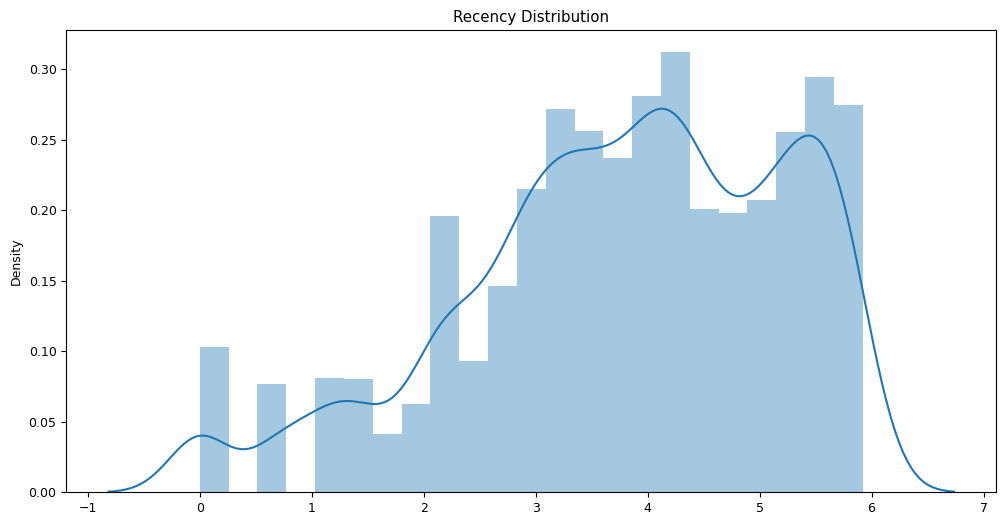

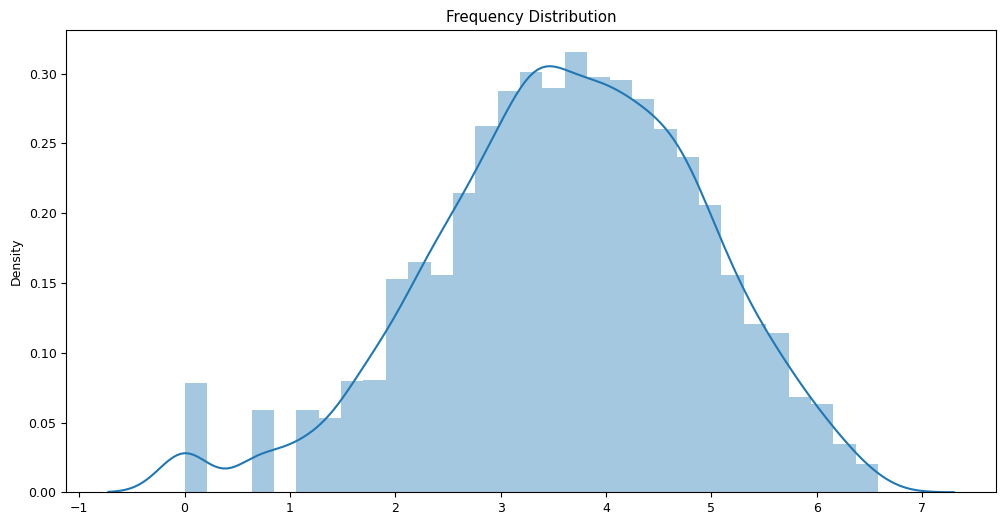

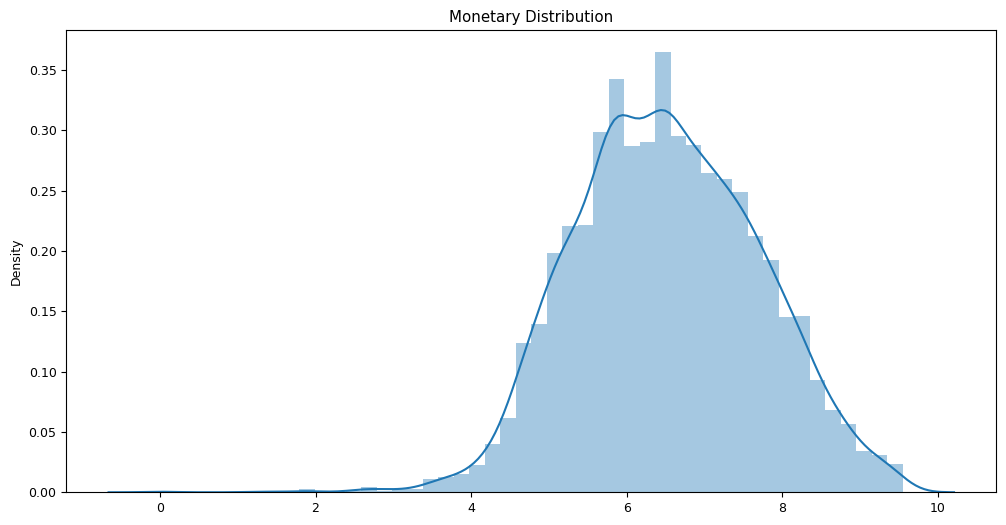

In [441]:
#CHECKING DISTRIBUTION
for col in Log_Tfd_Data:
  plt.figure(figsize=(12,6))
  sns.distplot(x=Log_Tfd_Data[col])
  plt.title(f'{col} Distribution')

In [442]:
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12347.0            Platinaum     0.693147       5.204007      8.368693  
12348.0                 Gold     4.317488       3.433987      7.494007  
12349.0            Platinaum     2.890372       4.290459      7.471676  
12350.0                Bronz     5.736572       2.833213      5.812338  
12352.0            Platinaum     3.583519       4.442651      7.826459

# **Building the Model**

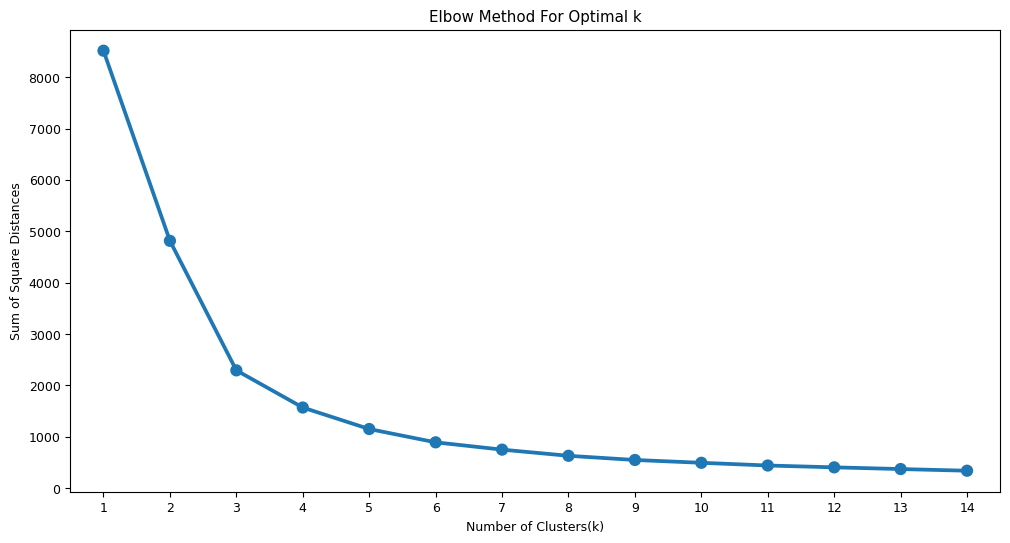

In [443]:
# Taking Recency and Monetory in list.
Recency_and_Monetary_feat=['Recency','Monetary']

# Taking only values of recency and monetory in X.
X = rfm_dataframe[Recency_and_Monetary_feat].values

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

###  Now, Here we can see that Optimal value for cluster came out to be 2



## **Applying Silhouette Score Method on Recency and Monetary**

## Calculation of Silhouette score
### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.
###  The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point.

### The Silhouette Coefficient for a sample is S=(b−a)max(a,b)


In [444]:
features_rec_mon=['Recency','Monetary']
X_features_rec_mon=rfm_dataframe[features_rec_mon].values
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_features_rec_mon)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_features_rec_mon, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7770535685072936
For n_clusters = 3, silhouette score is 0.7055945538340188
For n_clusters = 4, silhouette score is 0.6533888618954505
For n_clusters = 5, silhouette score is 0.6160017875424573
For n_clusters = 6, silhouette score is 0.5732879855952855
For n_clusters = 7, silhouette score is 0.5479552162103344
For n_clusters = 8, silhouette score is 0.5321827694274041


### **Now, Here we can see that for cluster 2 highest silhoutte score =0.77**

For n_clusters = 2 The average silhouette_score is : 0.7770535685072936
For n_clusters = 3 The average silhouette_score is : 0.7055945538340188
For n_clusters = 4 The average silhouette_score is : 0.651135650165732
For n_clusters = 5 The average silhouette_score is : 0.6158904186056874
For n_clusters = 6 The average silhouette_score is : 0.5730282755558023


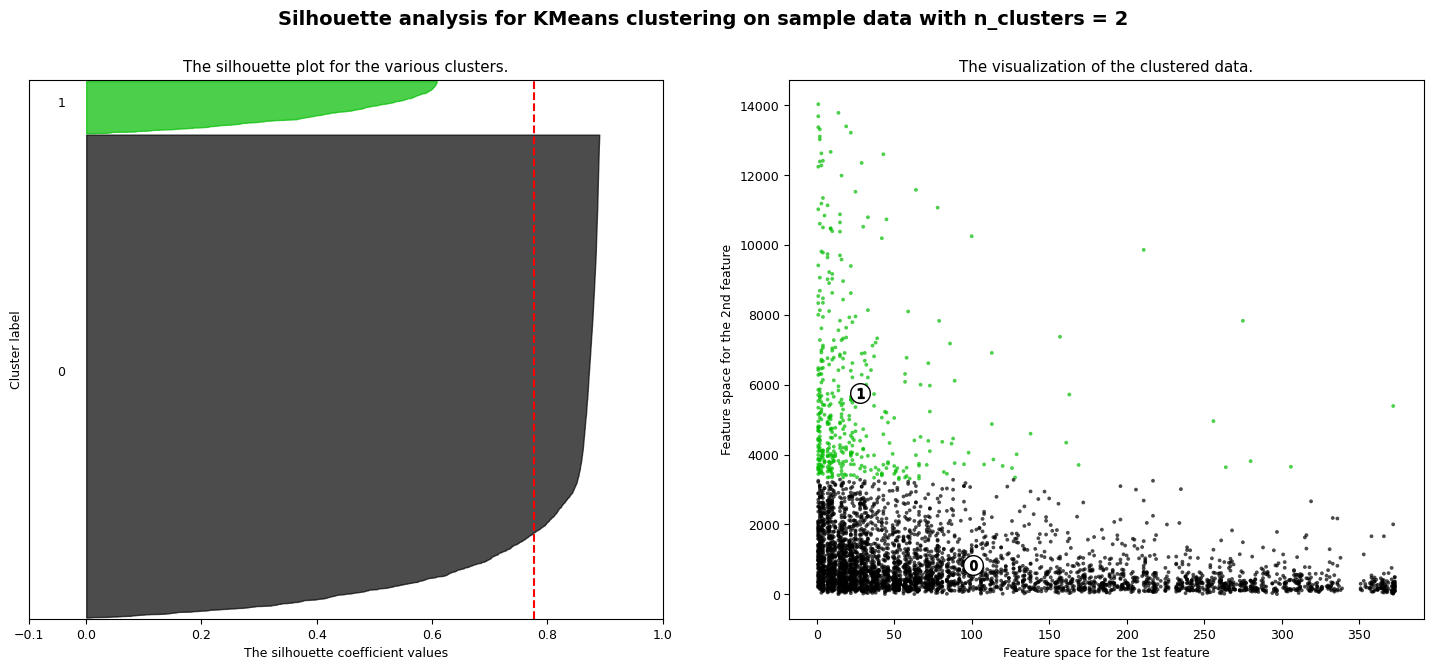

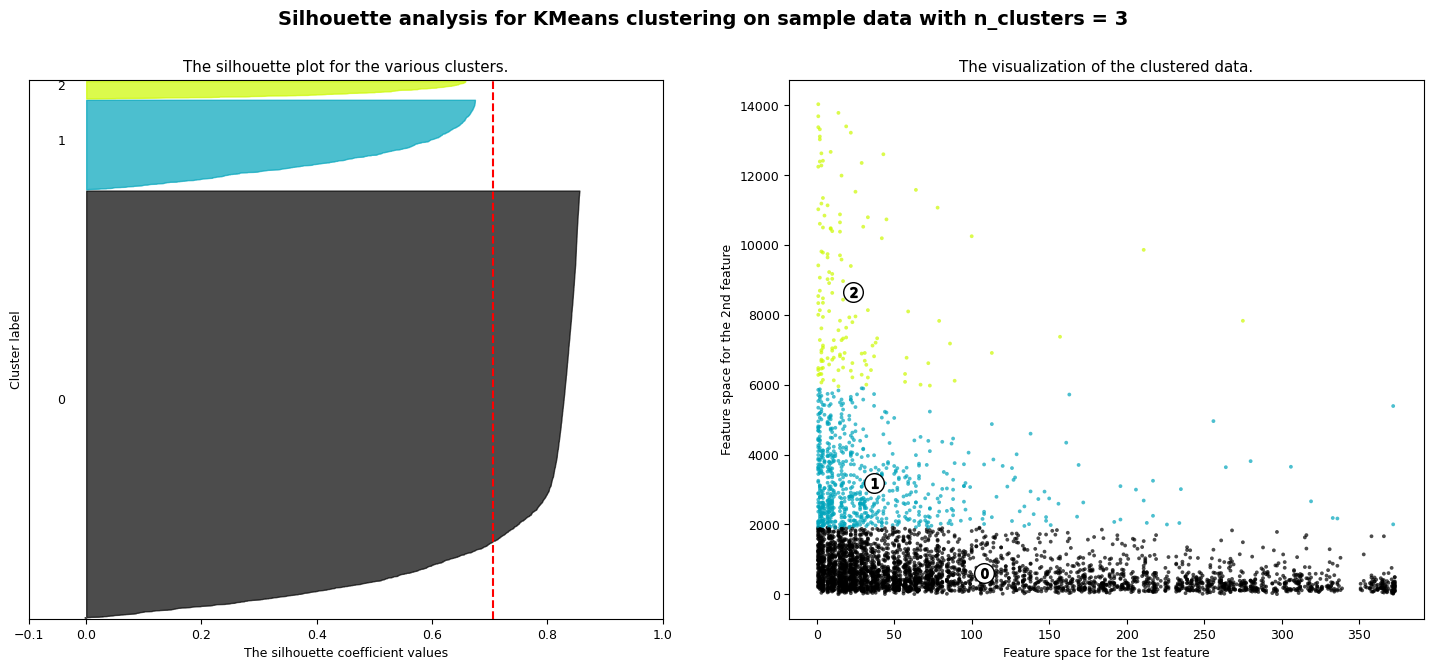

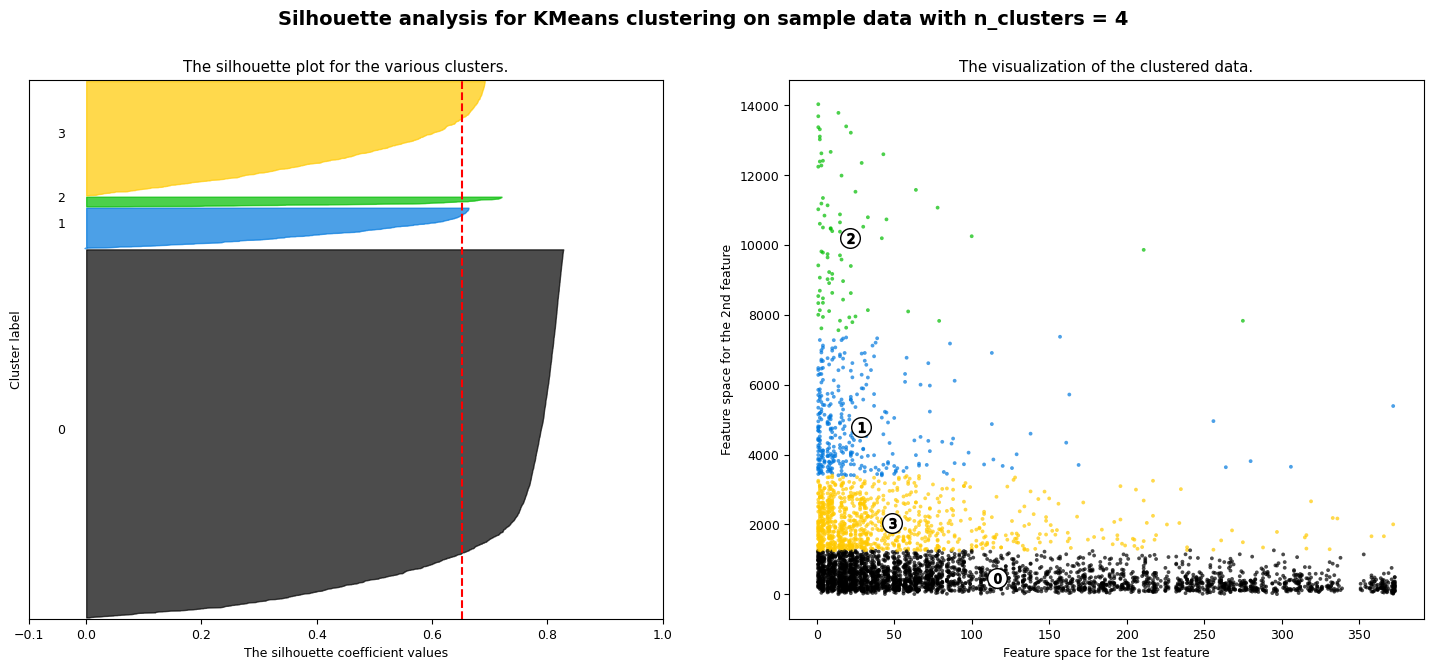

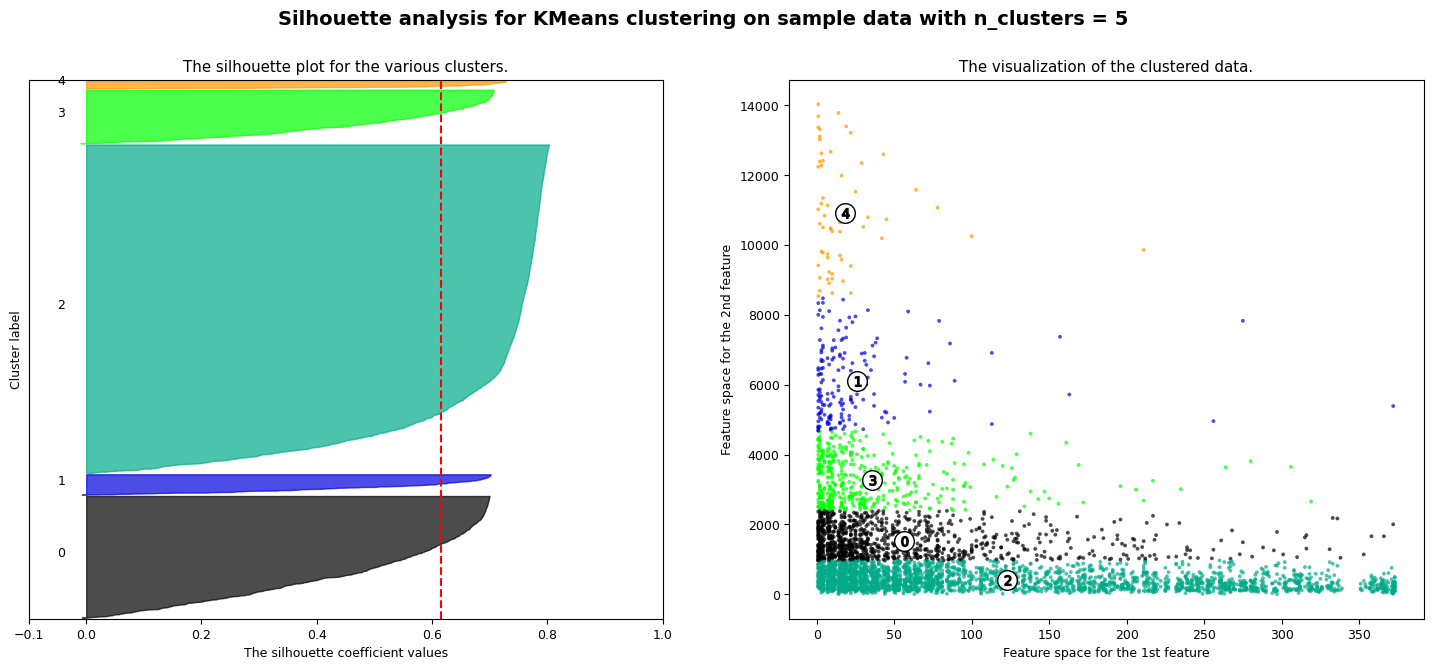

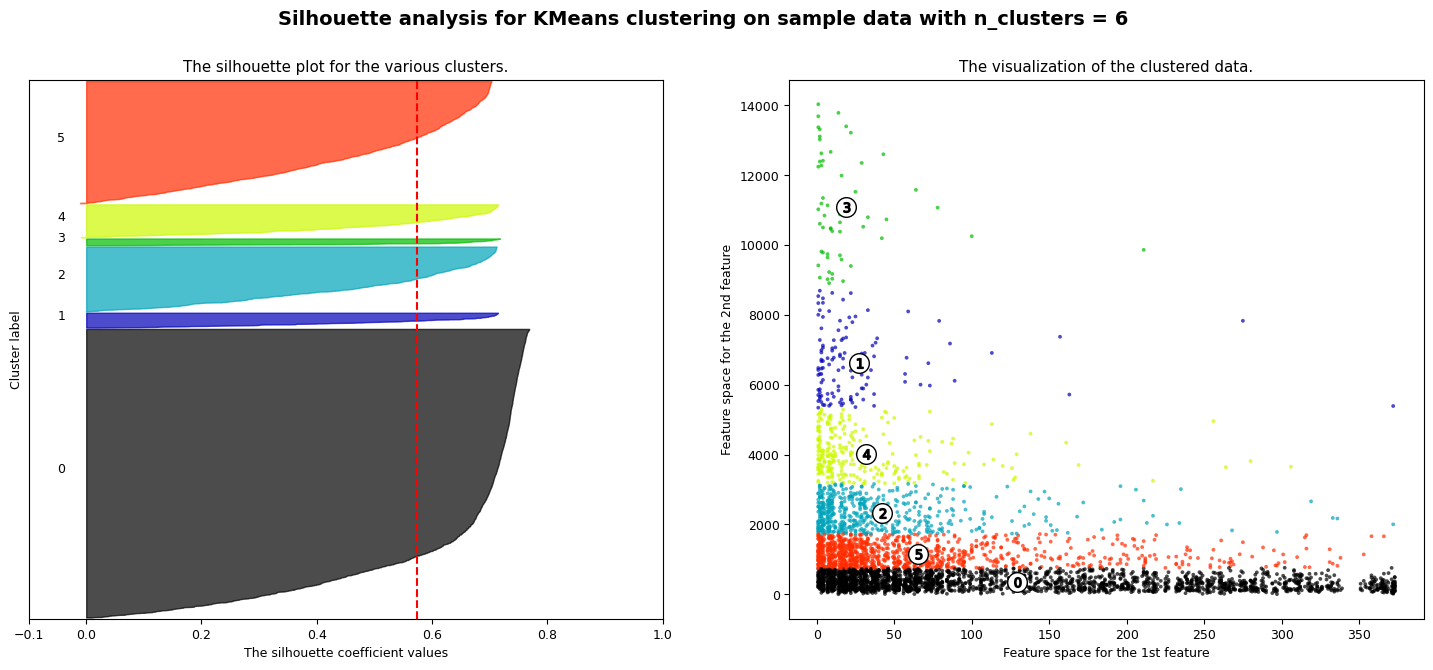

In [445]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Let's Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_features_rec_mon) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X_features_rec_mon)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_features_rec_mon, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Now, Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_features_rec_mon, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_features_rec_mon[:, 0], X_features_rec_mon[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Now, Here giving n_clusters=2 on Kmeans Model.**

In [446]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [447]:
# Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   
12357.0          33        131   6207.67  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   
12357.0            Platinaum     3.496508       4.875197      8.733541   

            Cluster_based_rec_mon  
CustomerID                         
12347.0                         1  
12348.0                         1  
12349.0                         1  
12350.0                         0  
12352.0                         1  
12353.0                         0  
12354.0                         0  
12355.0                         0  
12356.0                         1  
12357.0                         1

In [448]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 1.48814683, -0.48068749],
       [-0.52921363,  0.17094171]])

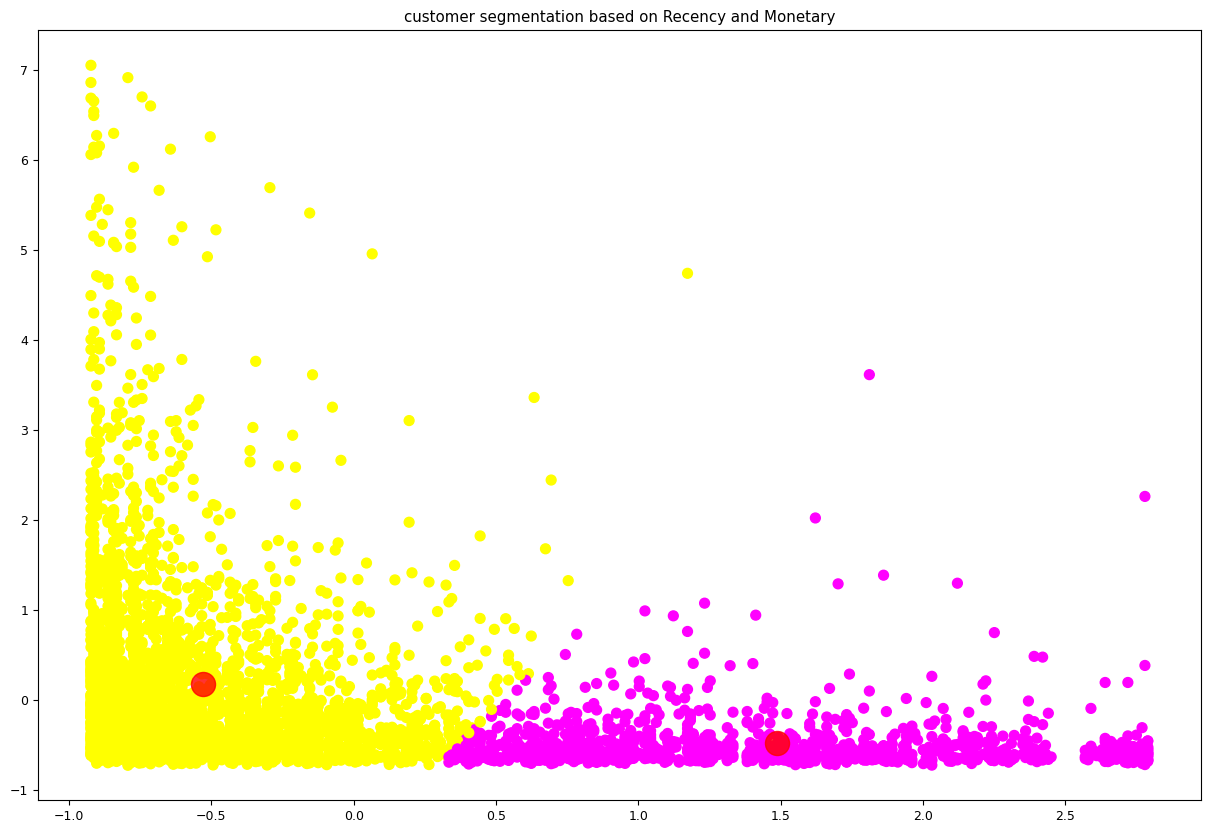

In [449]:
# Ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **Hierarchical Clustering**

## How should we Choose the Number of Clusters in Hierarchical Clustering?
## A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
## We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

## Dendogram to find the optimal number of clusters

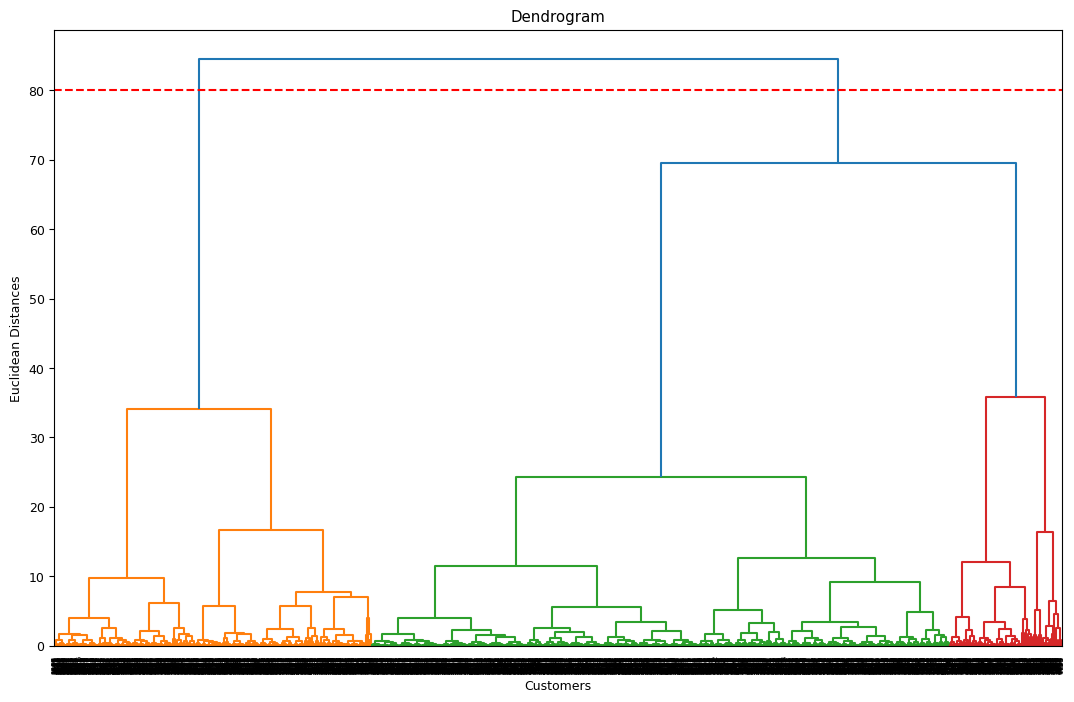

In [450]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [451]:
# Fitting hierarchical clustering to dataset(recency and monetry)
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

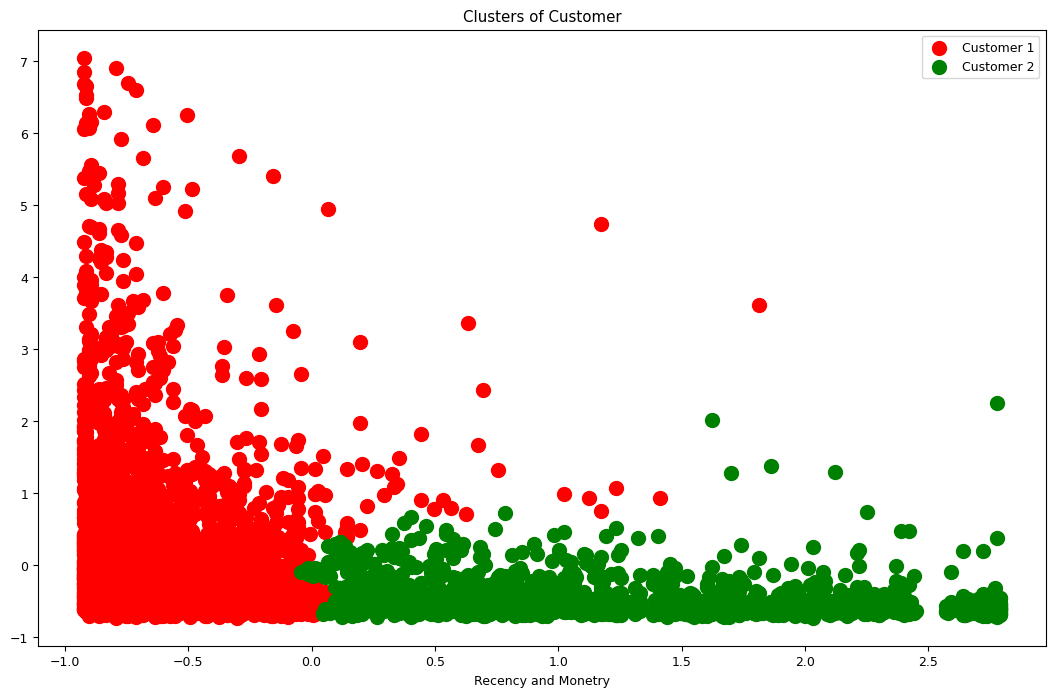

In [452]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Customer 2')
# Plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.title('Clusters of Customer')
plt.xlabel('Recency and Monetry')

plt.legend()
plt.show()

##The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=80
##No. of Cluster = 2

#**DBSCAN Algorithm on Recency and Monetary**

In [453]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [454]:
# Eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
# Codesource(sklearn documentation)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 51
Silhouette Coefficient: 0.633


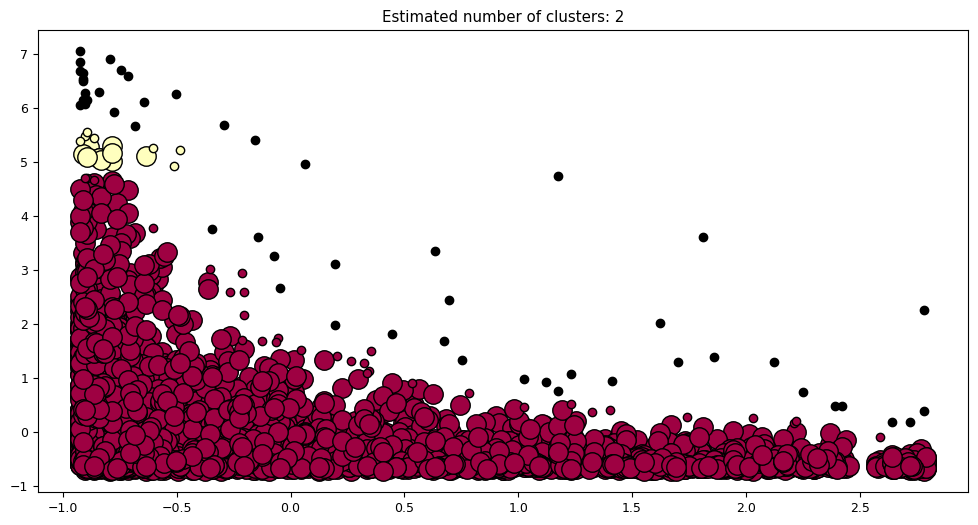

In [455]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

#**K-Means Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##Applying Elbow Method on Frequency and Monetary

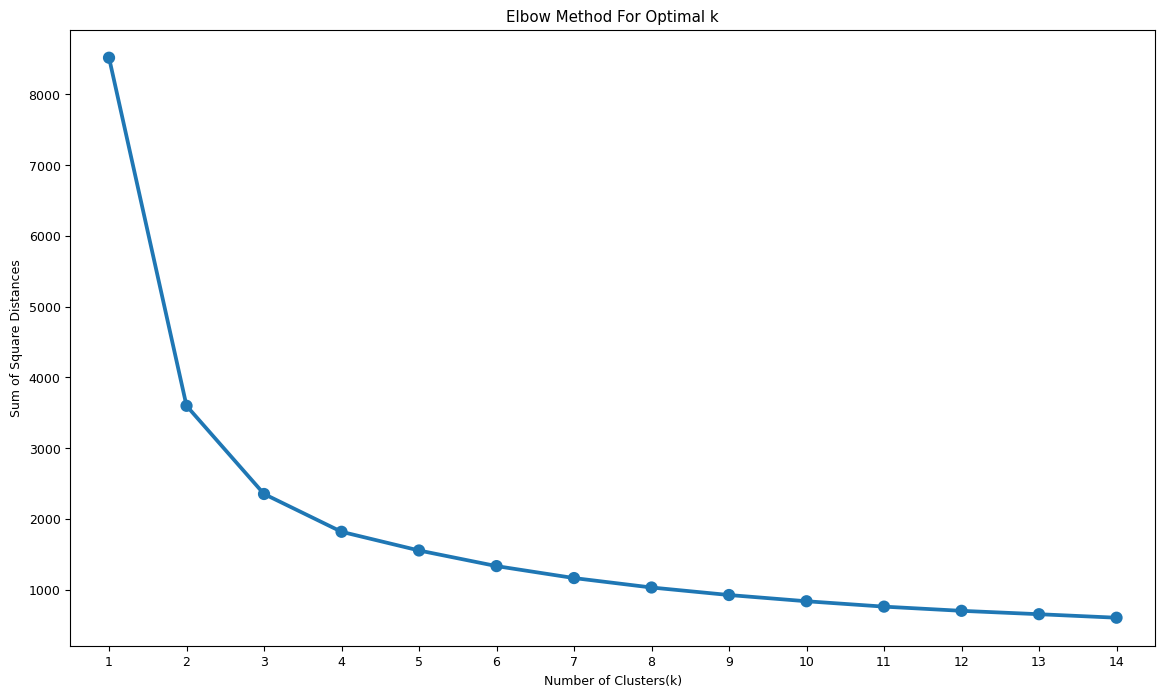

In [456]:
# Taking Frequency and Monetory_log in list.
Frequency_and_Monetary_feat=['Frequency_log','Monetary_log']

# Taking only values of Frequency and monetory in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values

# Standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(14,8))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##Now, Here we can see that Optimal value for cluster came out to be 2

## Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)

In [457]:
# Taking Recency and Monetory_log in list.
Frequency_and_Monetary_feat=['Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values

# Standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4820942445531743
For n_clusters = 3, silhouette score is 0.4141298453471039
For n_clusters = 4, silhouette score is 0.37379966867878156
For n_clusters = 5, silhouette score is 0.335244104250472
For n_clusters = 6, silhouette score is 0.35225829204800146
For n_clusters = 7, silhouette score is 0.3408310056567564
For n_clusters = 8, silhouette score is 0.35473192726700425
For n_clusters = 9, silhouette score is 0.3668937034456509
For n_clusters = 10, silhouette score is 0.35241944920151097
For n_clusters = 11, silhouette score is 0.3629885772444687
For n_clusters = 12, silhouette score is 0.35567855815122207
For n_clusters = 13, silhouette score is 0.3510472573497367
For n_clusters = 14, silhouette score is 0.35836961541412804
For n_clusters = 15, silhouette score is 0.36591789836081173


For n_clusters = 2 The average silhouette_score is : 0.4820942445531743
For n_clusters = 3 The average silhouette_score is : 0.4141298453471039
For n_clusters = 4 The average silhouette_score is : 0.37379966867878156
For n_clusters = 5 The average silhouette_score is : 0.335244104250472
For n_clusters = 6 The average silhouette_score is : 0.35225829204800146
For n_clusters = 7 The average silhouette_score is : 0.3408310056567564
For n_clusters = 8 The average silhouette_score is : 0.35473192726700425
For n_clusters = 9 The average silhouette_score is : 0.3668937034456509
For n_clusters = 10 The average silhouette_score is : 0.35241944920151097


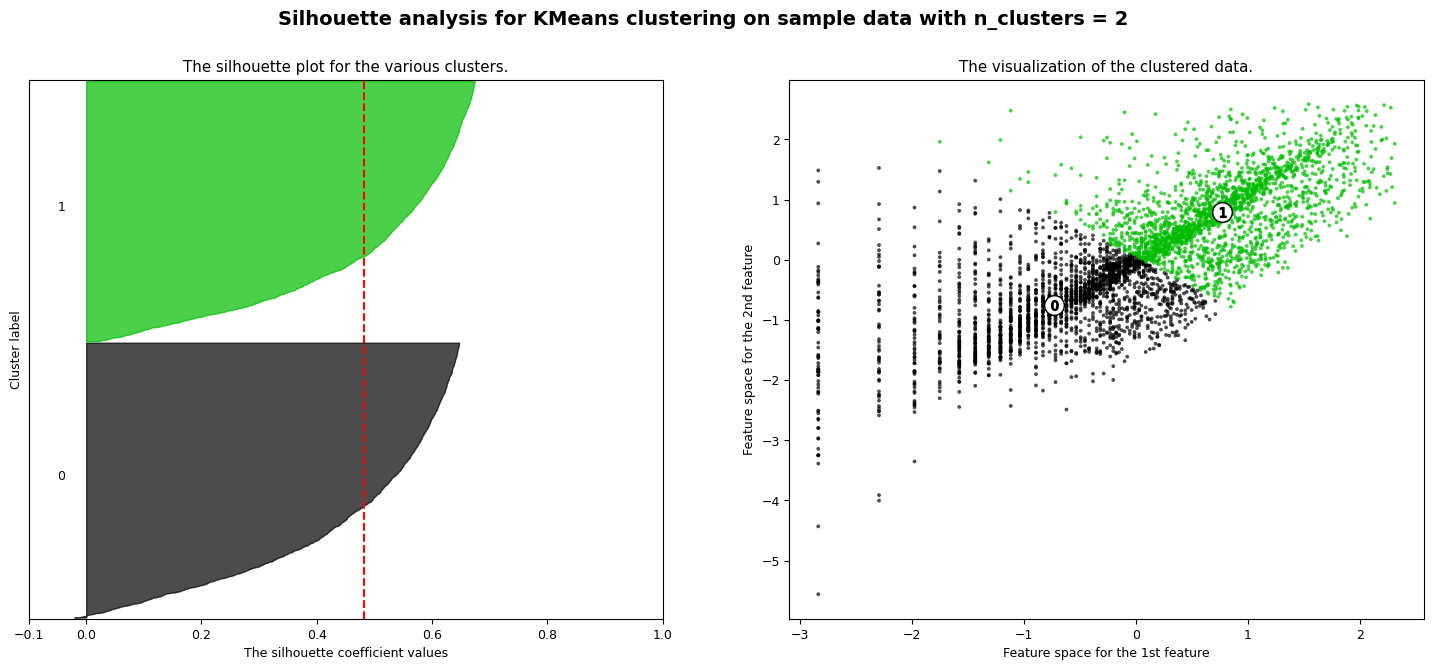

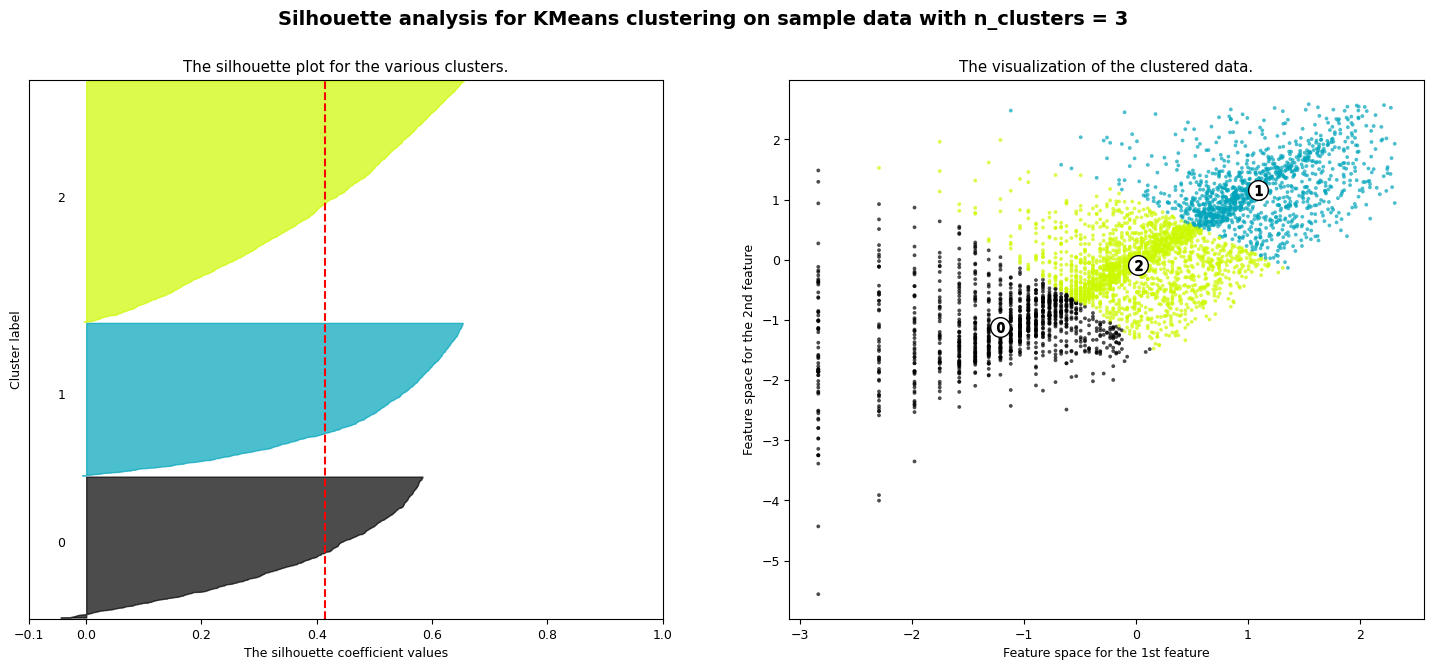

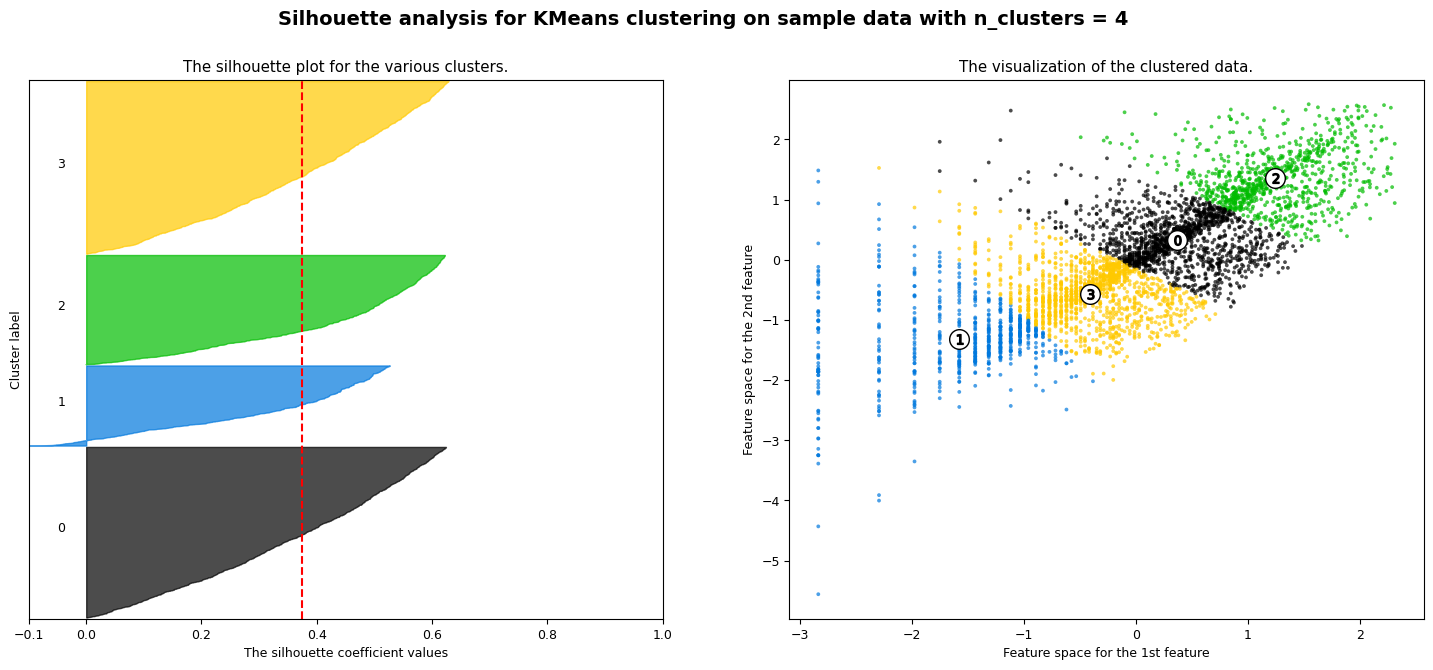

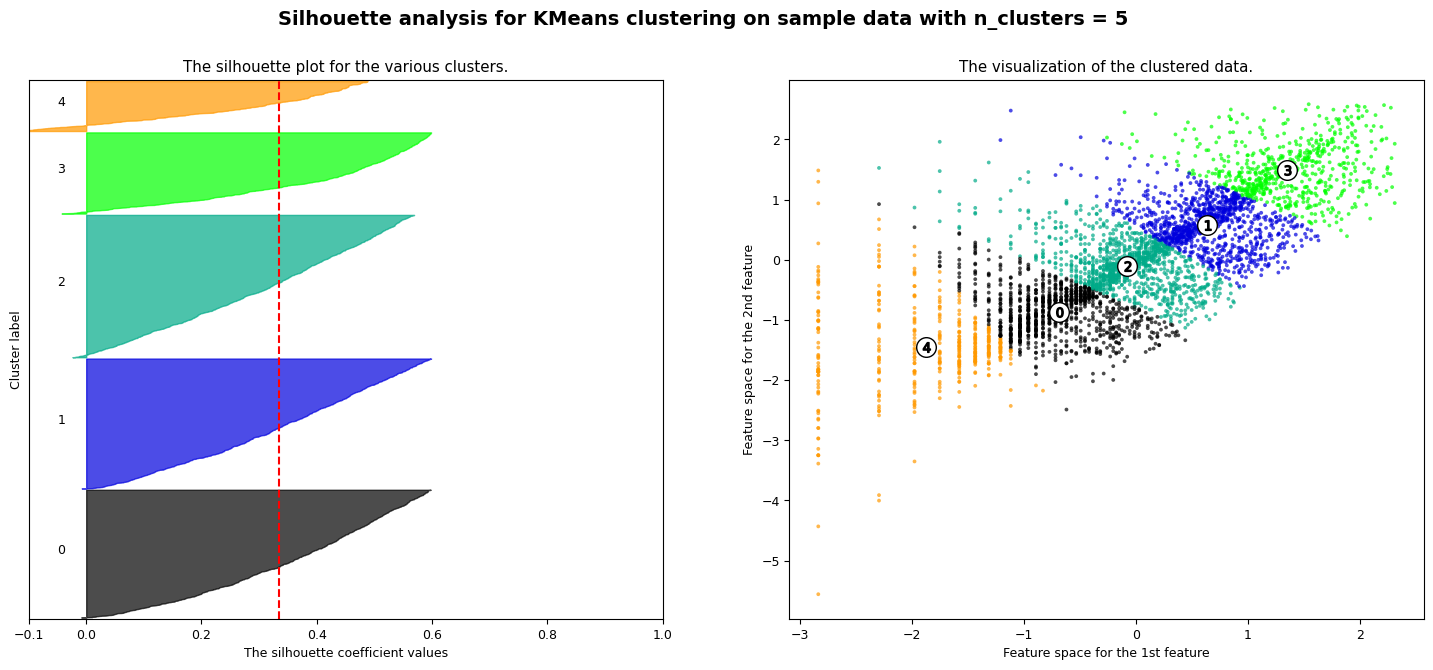

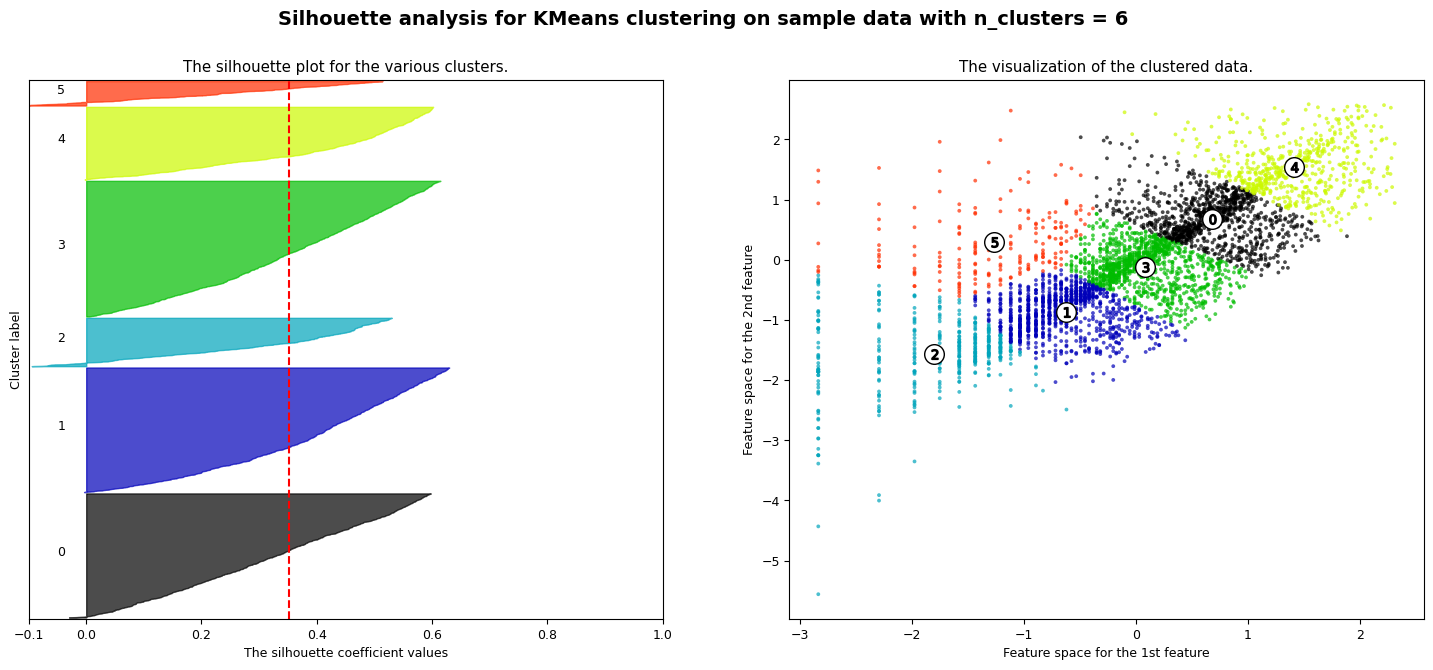

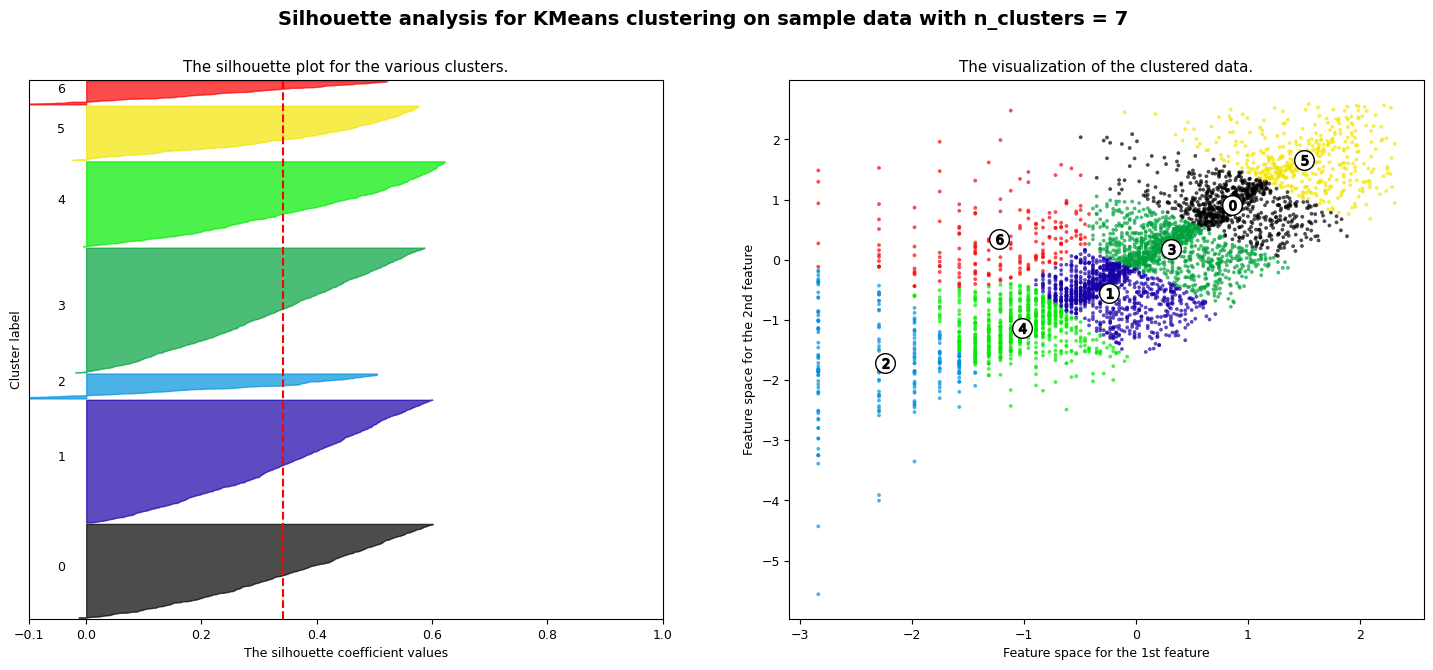

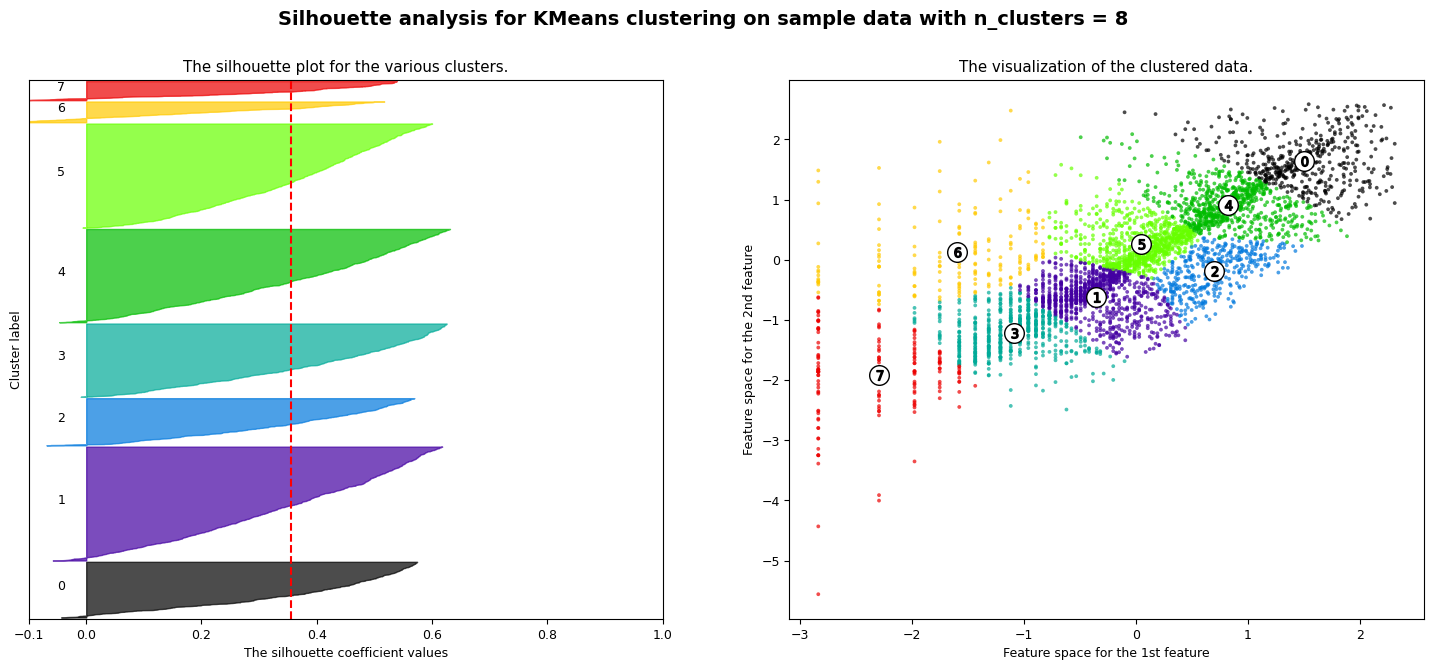

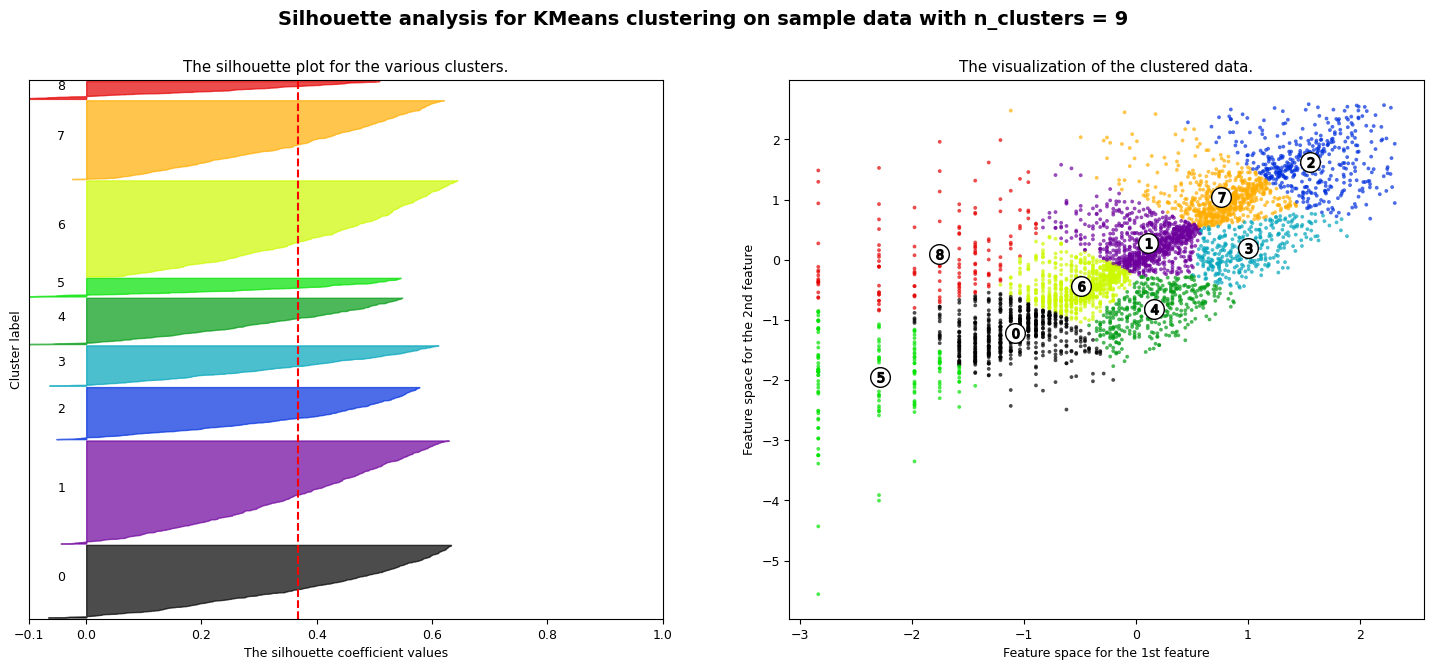

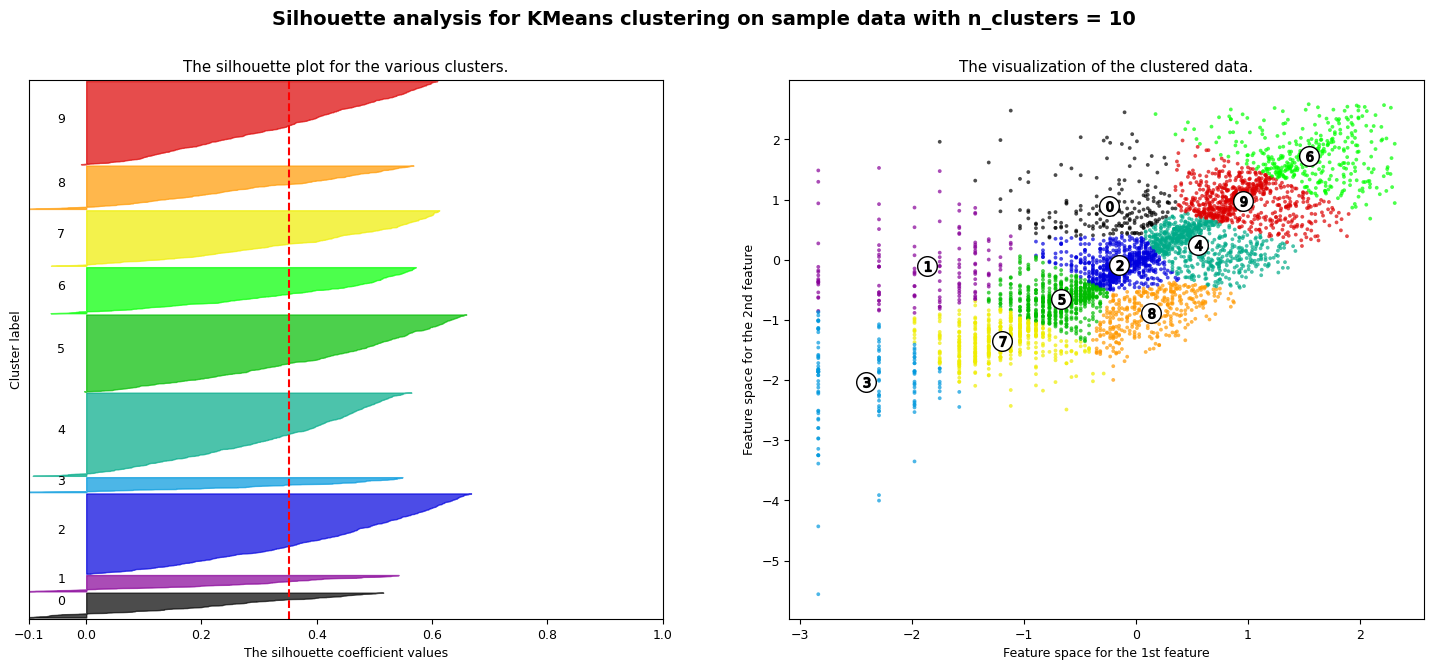

In [458]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [459]:
# Applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [460]:
# Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(5)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  
CustomerID                                                    
12347.0                         1                          0  
12348.0                         1                          0  
12349.0                         1                          0  
12350.0                         0                          1  
12352.0                         1                          0

In [461]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.77183035,  0.78856451],
       [-0.73226742, -0.74814381]])

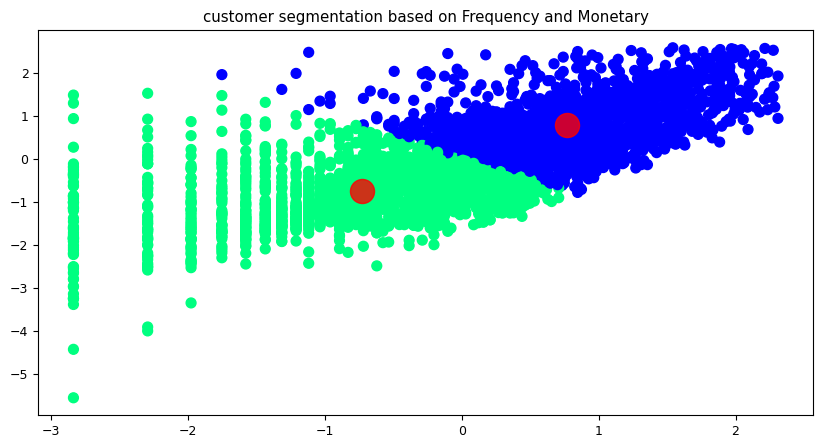

In [463]:
# Ploting visualizing the clusters
plt.figure(figsize=(10,5))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

##Hirachical Clustering:

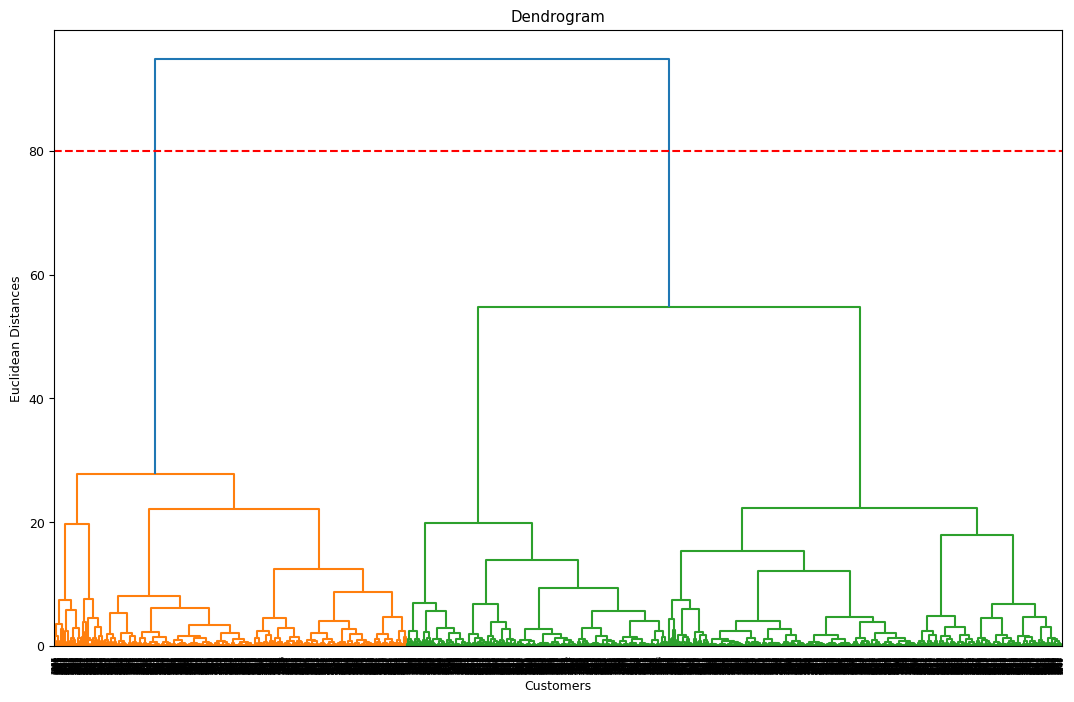

In [464]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()
# find largest vertical distance we can make without crossing any other horizontal line

In [465]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

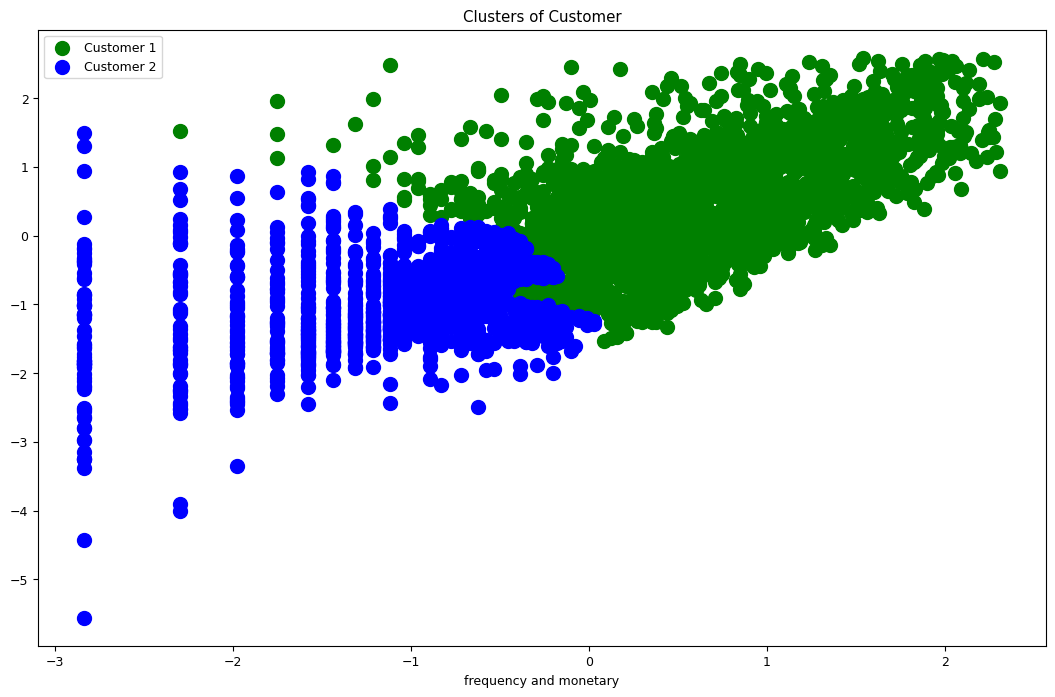

In [466]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('frequency and monetary')

plt.legend()
plt.show()

 ## **Recency, Frequency and Monetary**

## K-Means Clustering

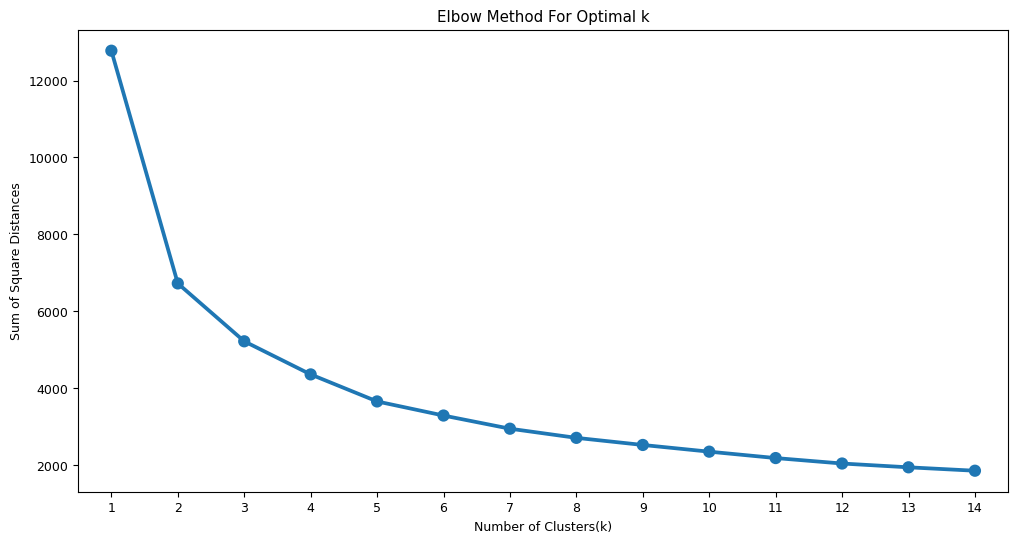

In [467]:
# Taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# StandardiZing the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [468]:
# Taking Recency_log,Frequency_log and Monetory_log in list.
Recency_Frequency_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_Frequency_Monetary_feat].values

# StandardiZing the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3939908700047457
For n_clusters = 3, silhouette score is 0.2948733795813835
For n_clusters = 4, silhouette score is 0.297207094162846
For n_clusters = 5, silhouette score is 0.2819762172240195
For n_clusters = 6, silhouette score is 0.26387881832333265
For n_clusters = 7, silhouette score is 0.2701038931391932
For n_clusters = 8, silhouette score is 0.2694566221992923
For n_clusters = 9, silhouette score is 0.2665841782931117
For n_clusters = 10, silhouette score is 0.27569275081138916
For n_clusters = 11, silhouette score is 0.2644894933336515
For n_clusters = 12, silhouette score is 0.26362824385442035
For n_clusters = 13, silhouette score is 0.2580448426527614
For n_clusters = 14, silhouette score is 0.25772207240212164
For n_clusters = 15, silhouette score is 0.25769212850584244


### Now, Here we can see the for n_cluster=2 silhouette score =.39 and it is good as compared to others

For n_clusters = 2 The average silhouette_score is : 0.3939908700047457
For n_clusters = 3 The average silhouette_score is : 0.2948733795813835
For n_clusters = 4 The average silhouette_score is : 0.297207094162846
For n_clusters = 5 The average silhouette_score is : 0.2819762172240195
For n_clusters = 6 The average silhouette_score is : 0.26387881832333265
For n_clusters = 7 The average silhouette_score is : 0.2701038931391932
For n_clusters = 8 The average silhouette_score is : 0.2694566221992923
For n_clusters = 9 The average silhouette_score is : 0.2665841782931117
For n_clusters = 10 The average silhouette_score is : 0.27569275081138916


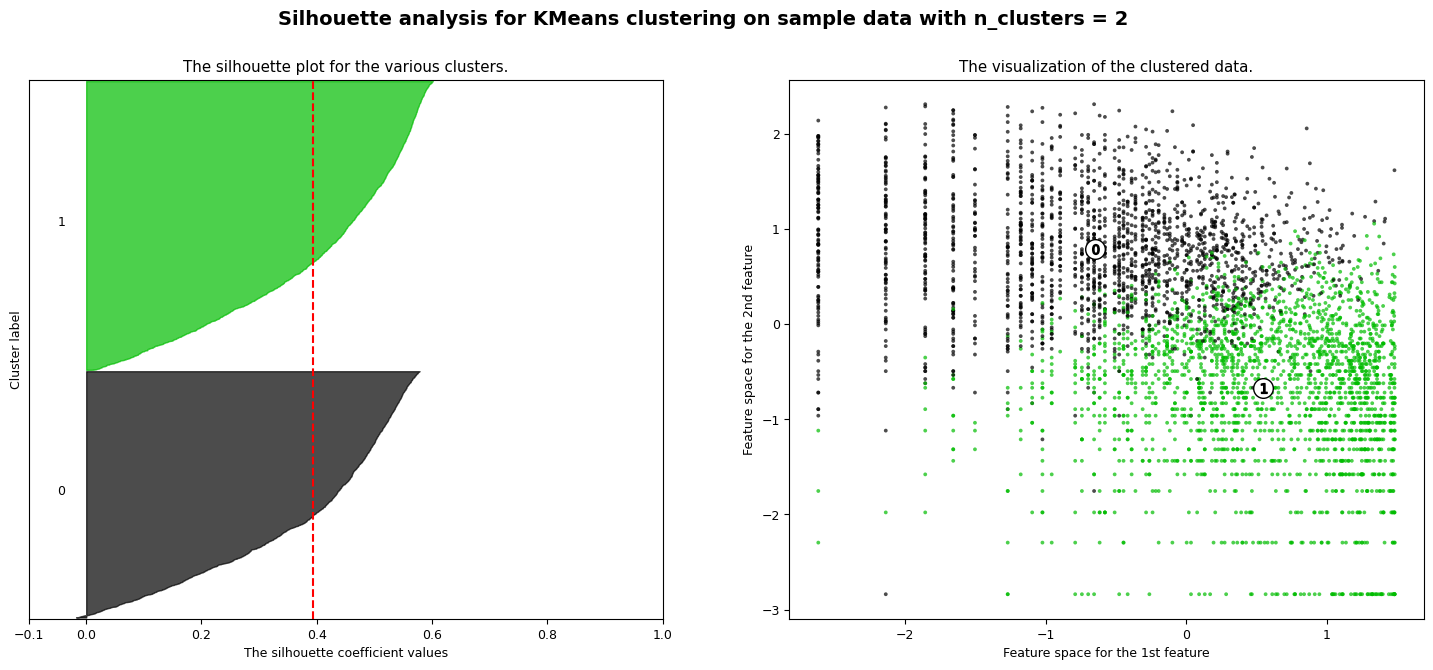

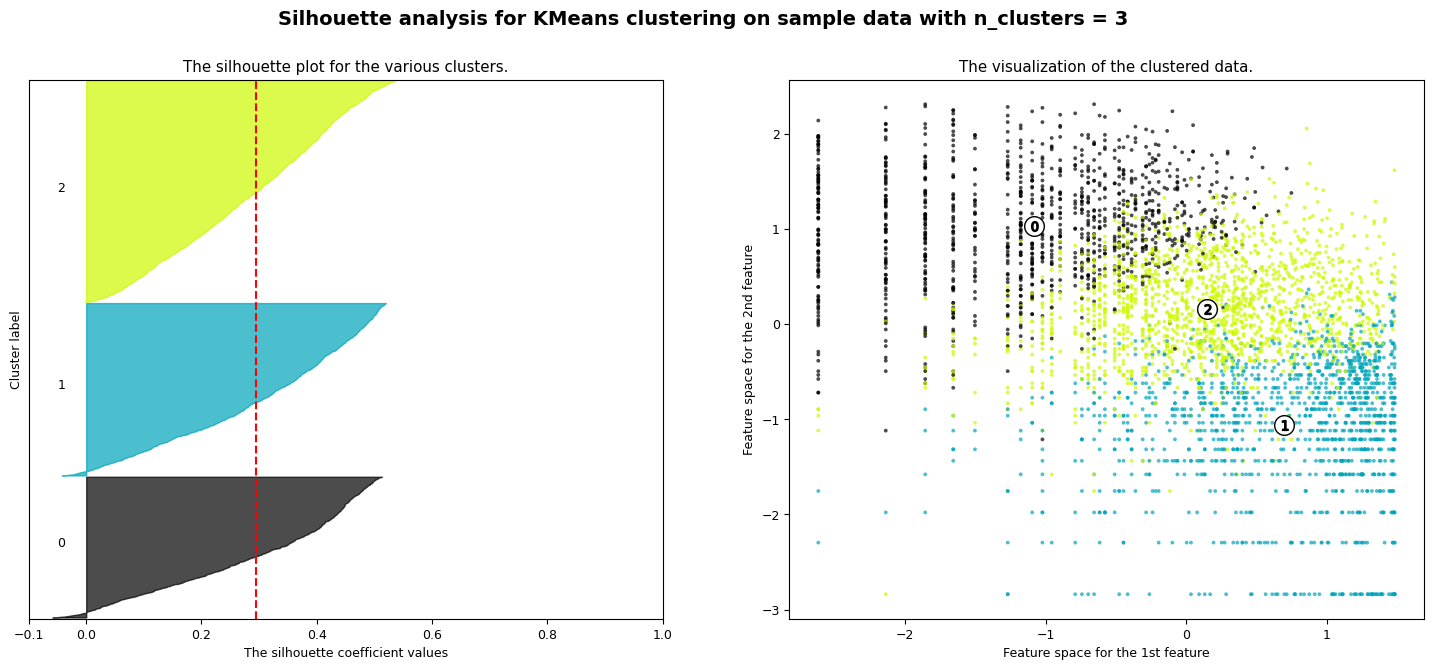

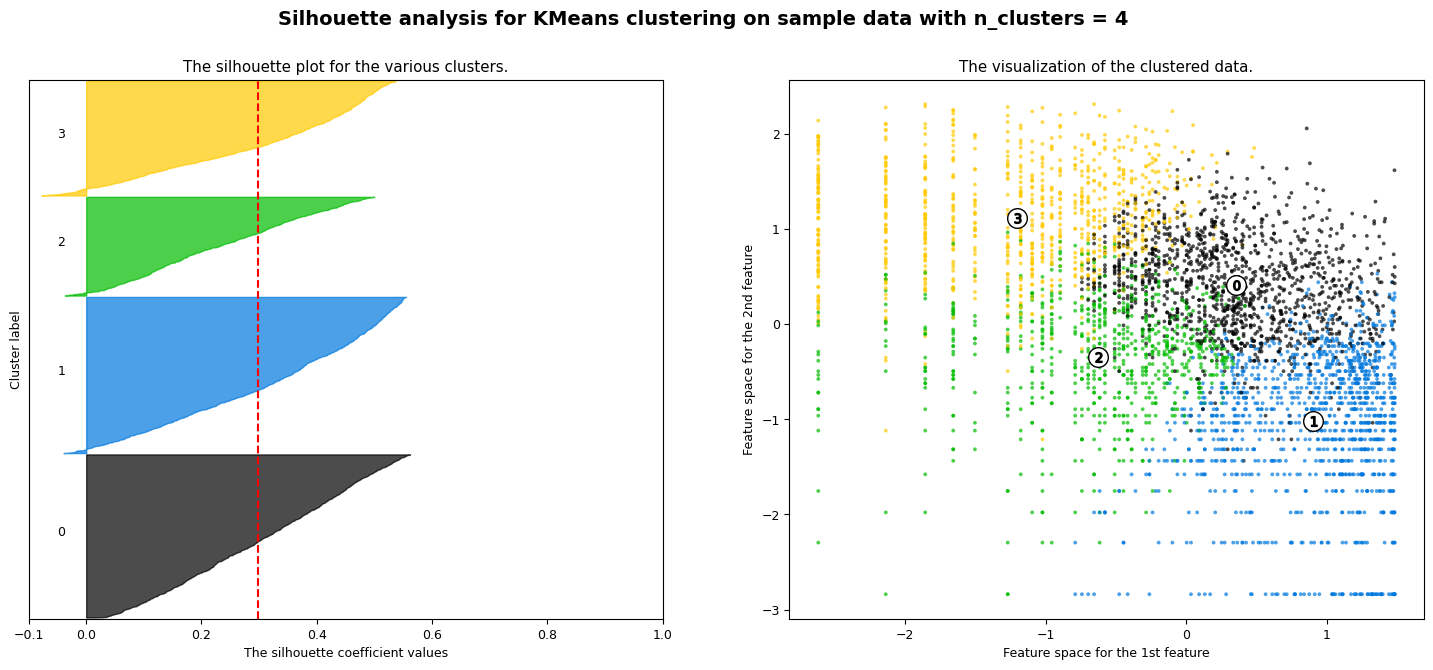

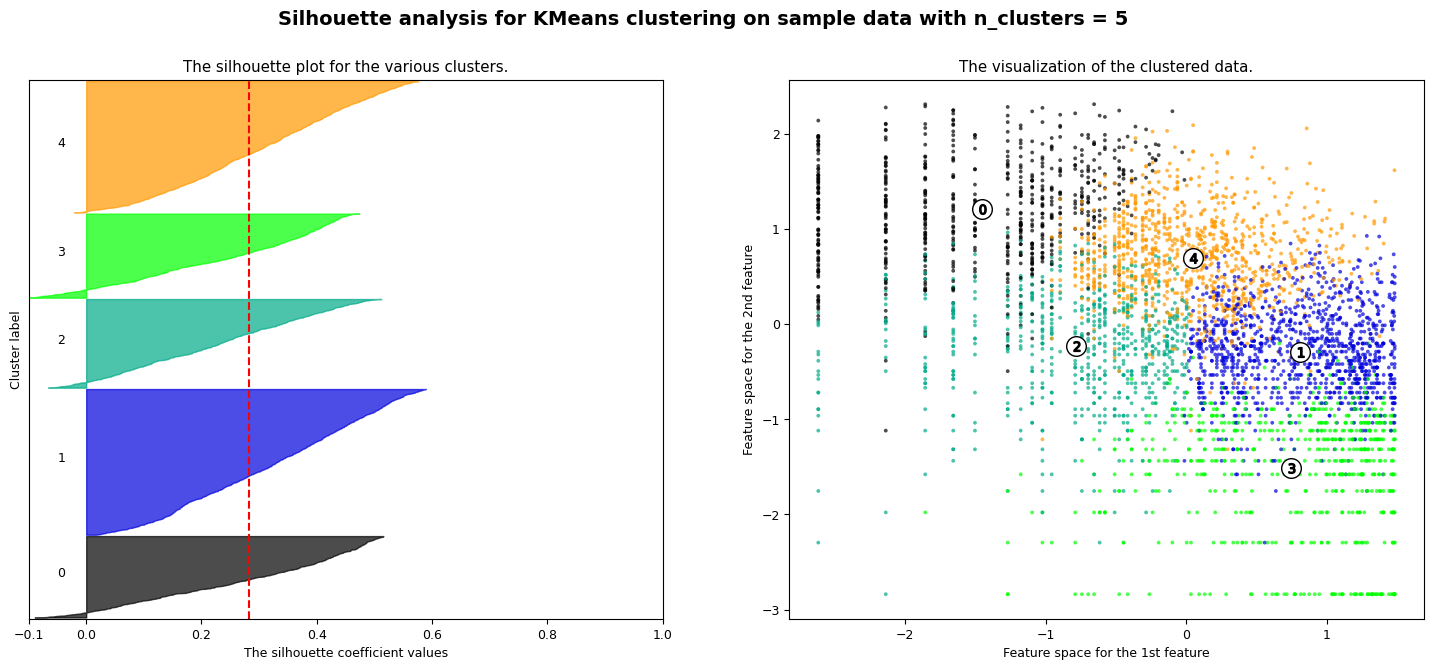

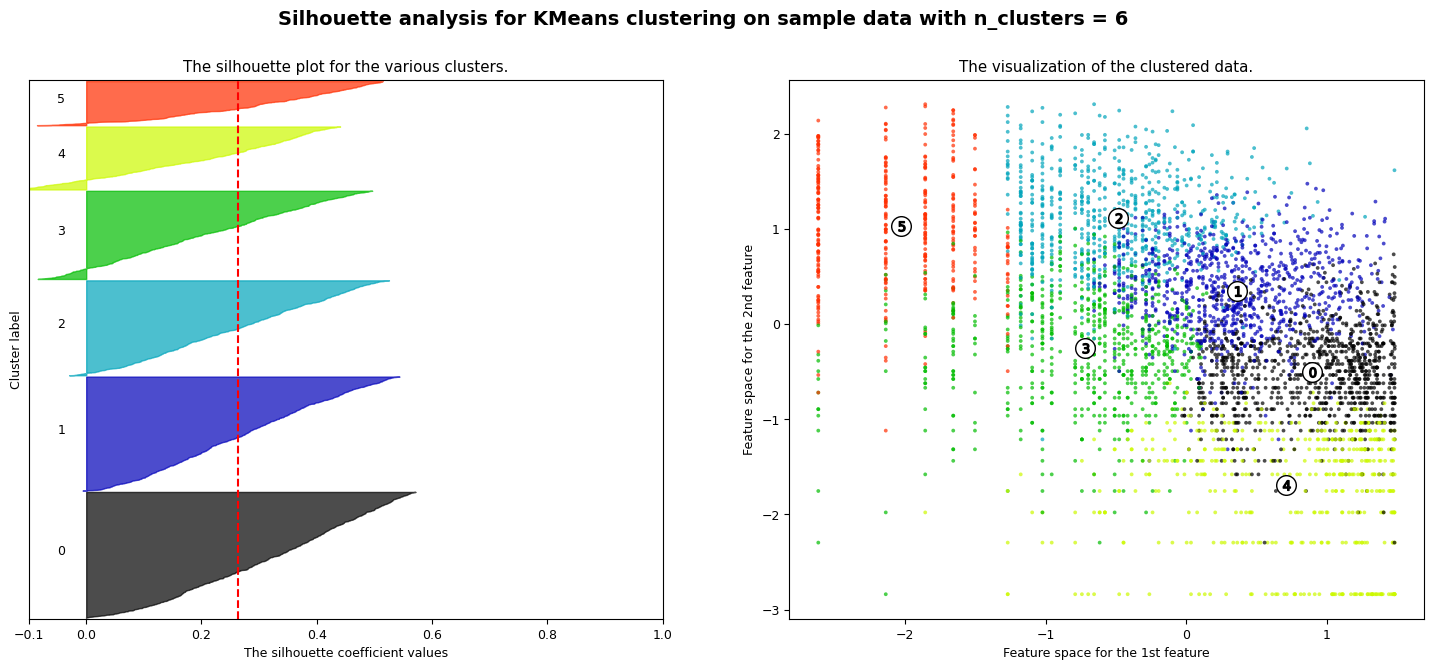

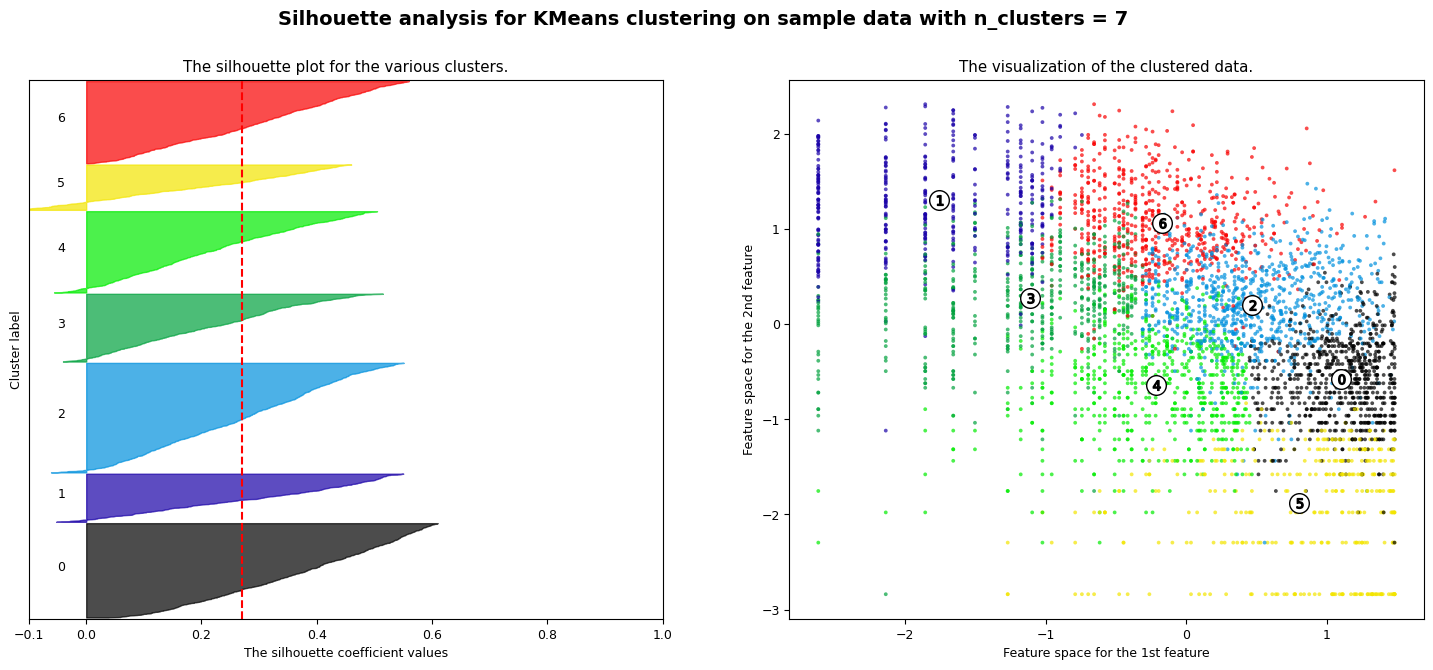

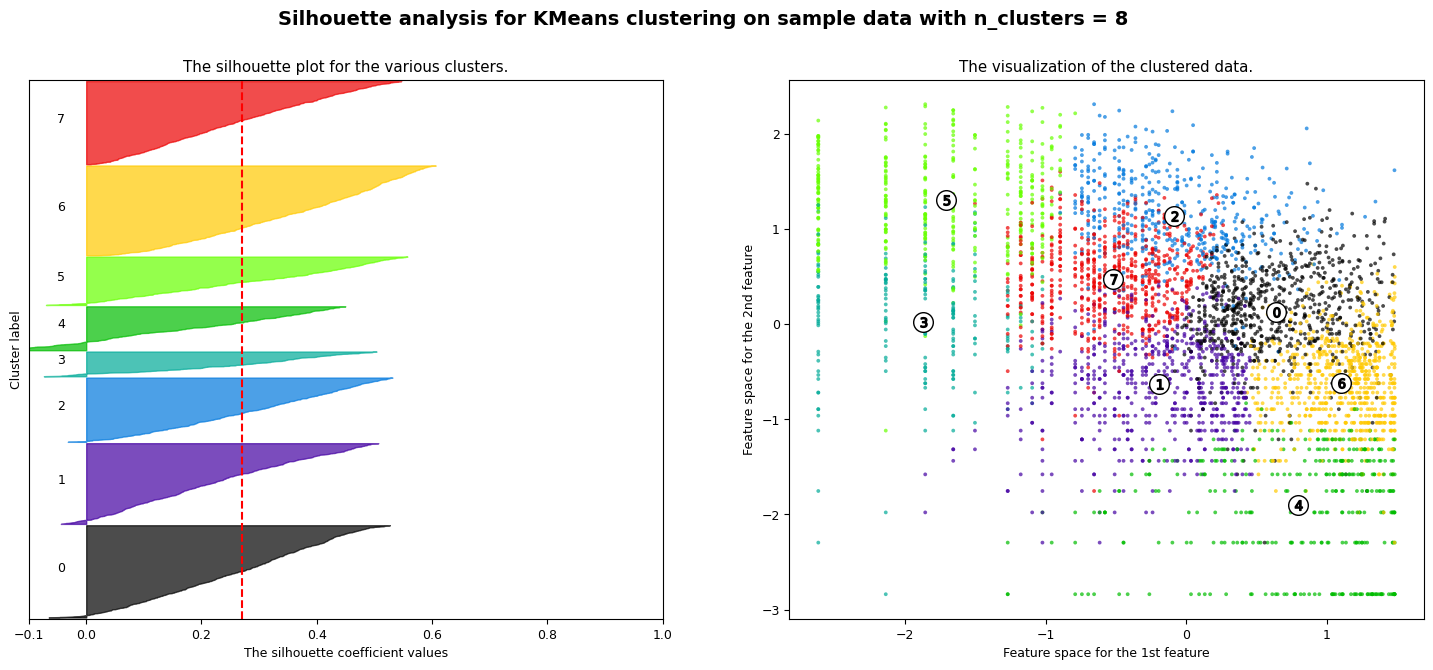

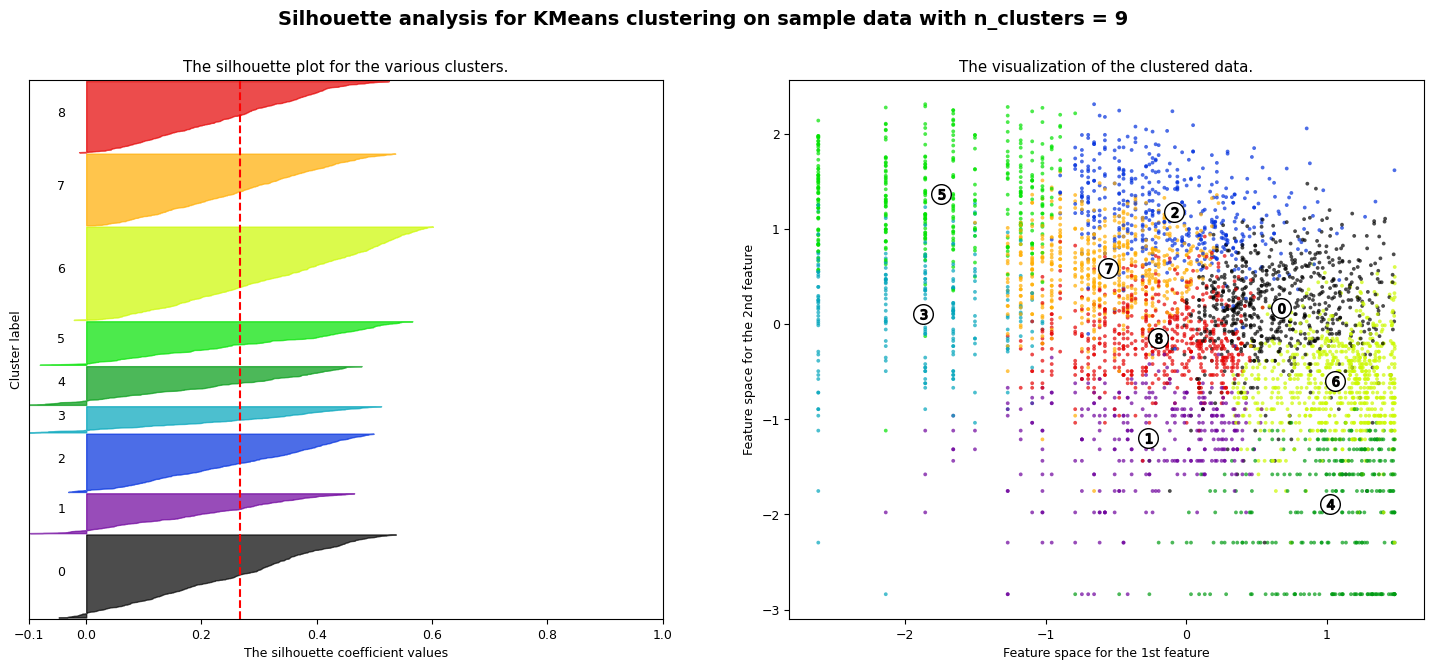

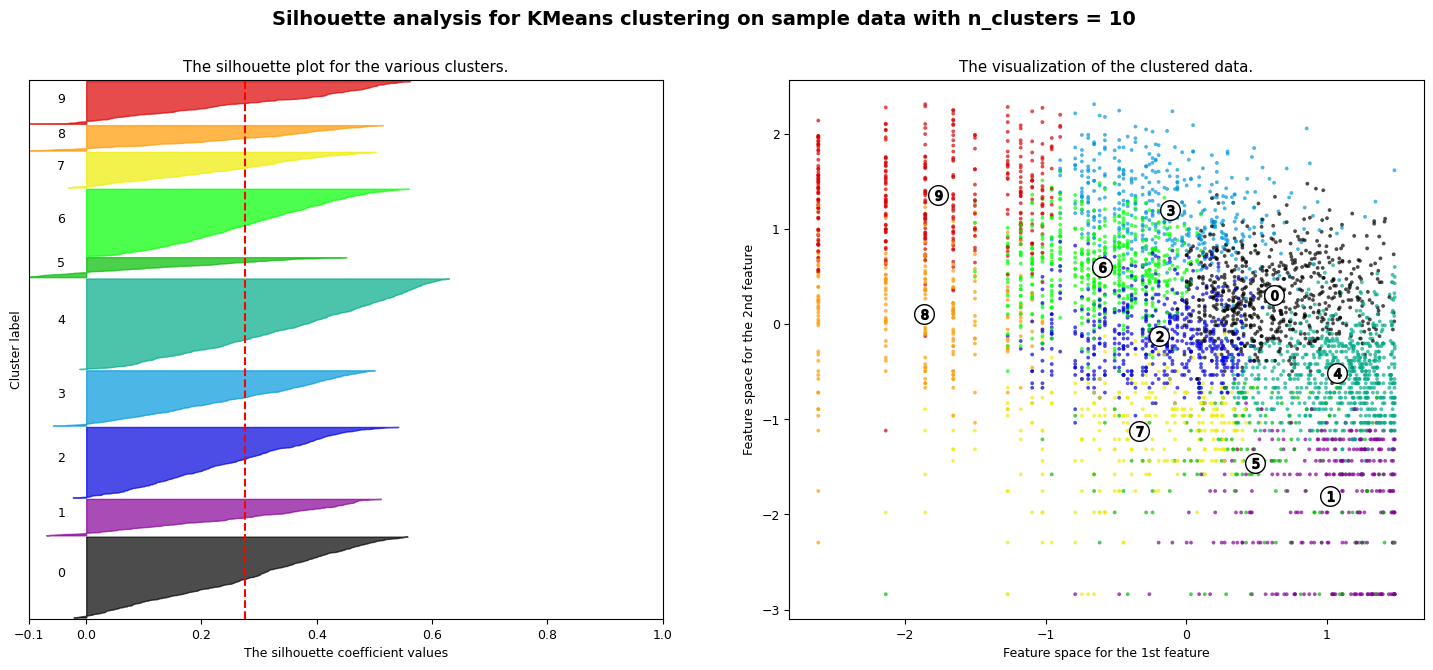

In [469]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **Hence , So giving n_clusters=2 on Kmeans Model.**

In [470]:
# Applying Kmeans_clustering algorithm
kmeans_rec_freq_mon = KMeans(n_clusters=2)
kmeans_rec_freq_mon.fit(X)
y_kmeans= kmeans_rec_freq_mon.predict(X)

In [471]:
# Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_rec_freq_mon'] = kmeans_rec_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   
12357.0          33        131   6207.67  2  1  1       211          4   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   
12357.0            Platinaum     3.496508       4.875197      8.733541   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12347.0                         1                          0   
12348.0                         1                          0   
12349.0                         1                          0   
12350.0                         0                          1   
12352.0                         1                          0   
12353.0                         0                          1   
12354.0                         0                          0   
12355.0                         0                          1   
12356.0                         1                          0   
12357.0                         1                          0   

            Cluster_based_on_rec_freq_mon  
CustomerID                                 
12347.0                                 0  
12348.0                                 0  
12349.0                                 0  
12350.0                                 1  
12352.0                                 0  
12353.0                                 1  
12354.0                                 1  
12355.0                                 1  
12356.0                                 0  
12357.0                                 0

In [472]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_freq_mon.cluster_centers_
centers

array([[-0.64575347,  0.78381504,  0.7940616 ],
       [ 0.55181546, -0.66979317, -0.67854916]])

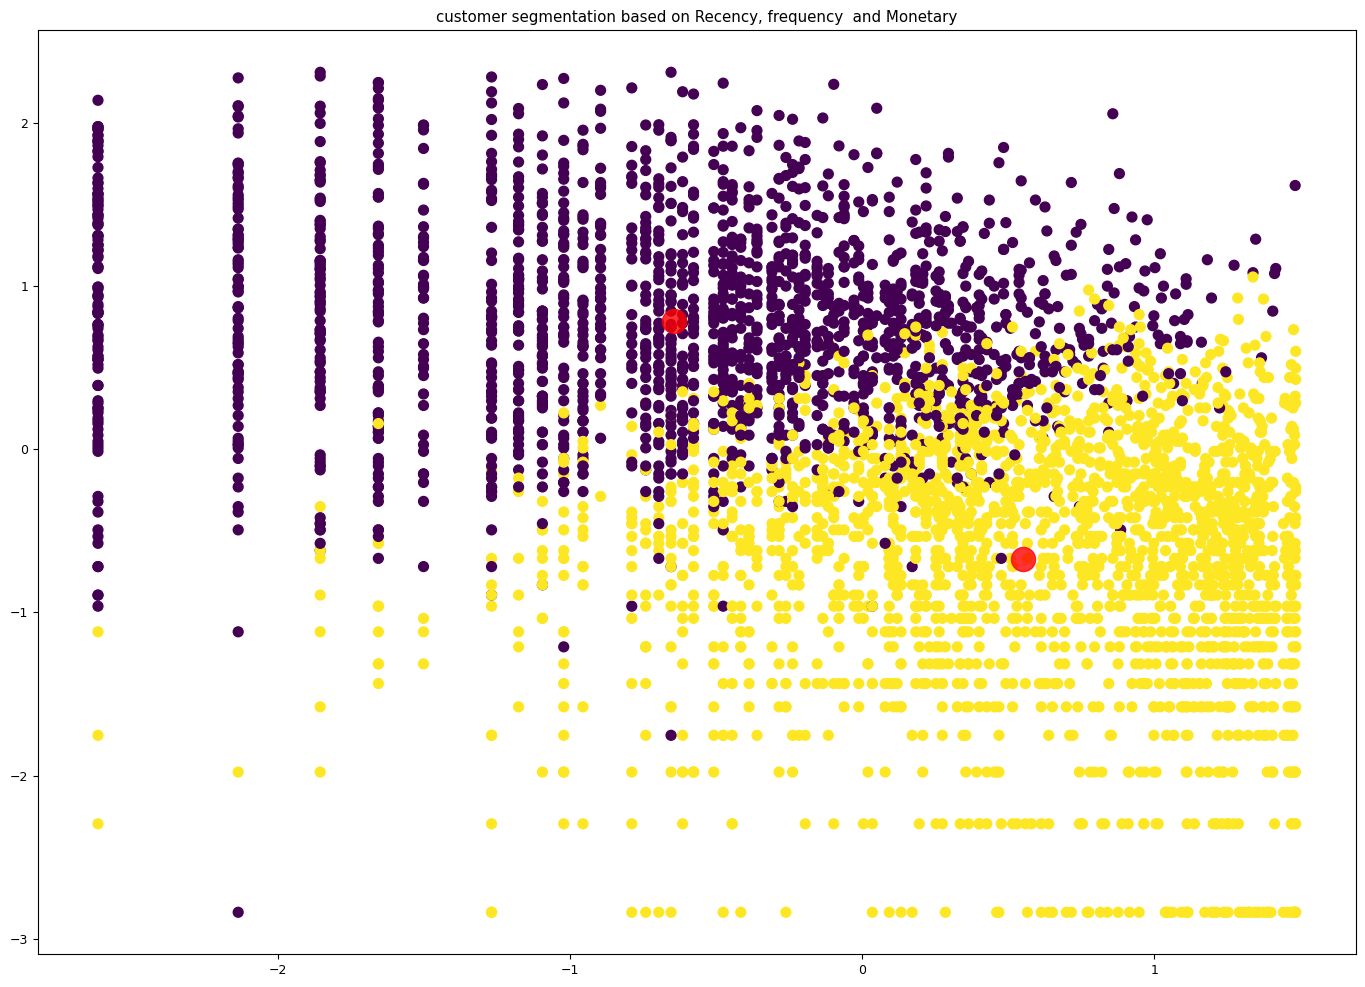

In [473]:
# Ploting visualizing the clusters
plt.figure(figsize=(17,12))
plt.title('customer segmentation based on Recency, frequency  and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_rec_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

 ## **Hierarchical Clustering on Recency frequency and Monetary :**

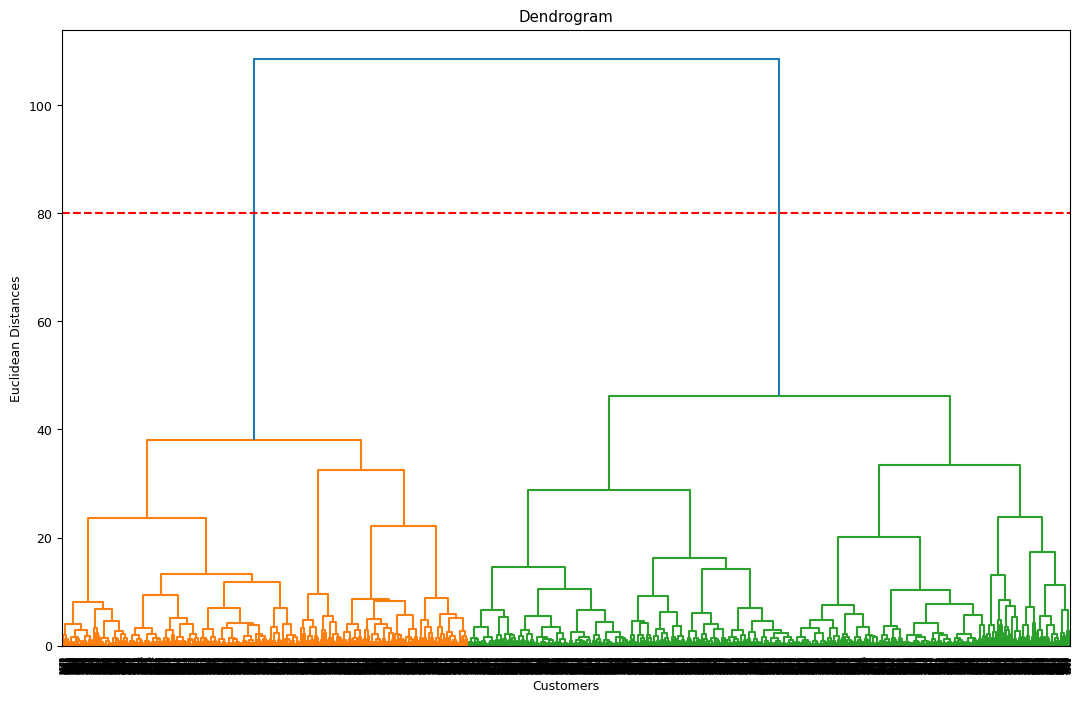

In [474]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

## The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
## **No. of Cluster = 2**

In [475]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

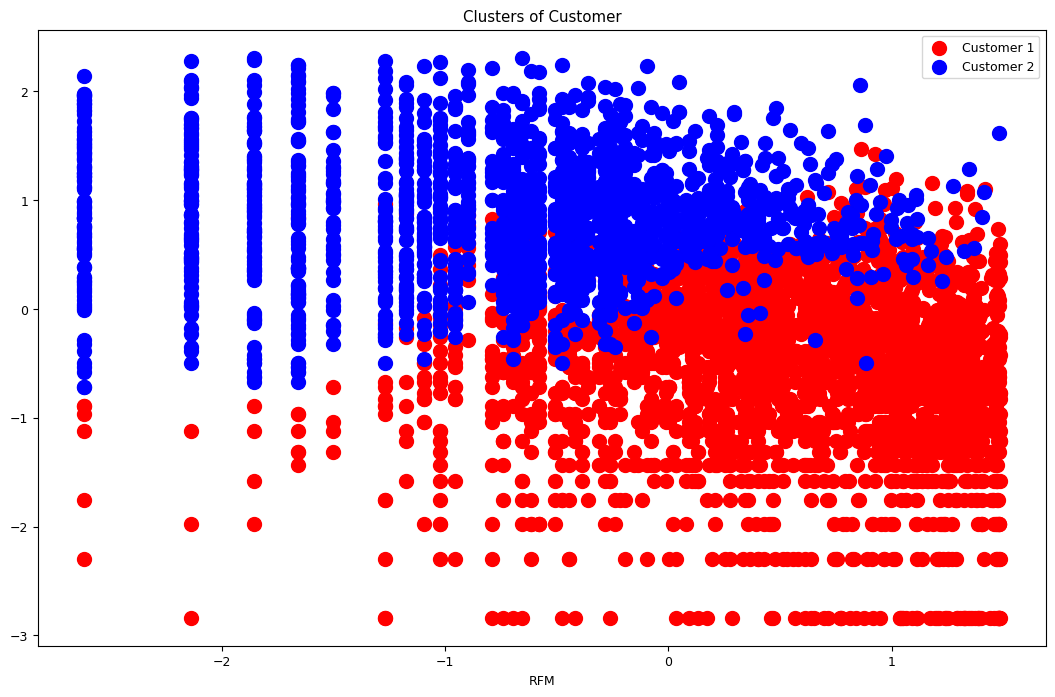

In [476]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [477]:
rfm_dataframe.head(5)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  1  2  1       121          4   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12347.0                         1                          0   
12348.0                         1                          0   
12349.0                         1                          0   
12350.0                         0                          1   
12352.0                         1                          0   

            Cluster_based_on_rec_freq_mon  
CustomerID                                 
12347.0                                 0  
12348.0                                 0  
12349.0                                 0  
12350.0                                 1  
12352.0                                 0

## **Conclusion Report:**

In [478]:
rfm_dataframe.groupby('Cluster_based_rec_mon').agg({
    'Recency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency               Monetary                      
                             mean  min  max         mean   min       max count
Cluster_based_rec_mon                                                         
0                      242.556849  127  373   447.705283  3.75   7832.47  1117
1                       40.457816    1  211  1623.097833  1.00  14034.99  3141

## **Here, From above on the basis of Recency and monetary we get two cluster:**

**1. Cluster 0 have high recency but low monetary**

**2. cluster 1 less recency and high monetary**

In [481]:
rfm_dataframe.groupby('Cluster_based_on_freq_mon').agg({
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']})

Frequency              Monetary                    \
                                 mean min  max         mean     min       max   
Cluster_based_on_freq_mon                                                       
0                          133.987446   4  721  2318.432792  271.19  14034.99   
1                           20.639689   1   93   364.317687    1.00   4055.72   

                                 
                          count  
Cluster_based_on_freq_mon        
0                          2071  
1                          2187

## **From above on the basis of frequency and monetary we get two cluster:**
**1. Cluster 0 have low frequency and low monetary**

**2. cluster 1 have high frequency and high monetary value**

In [482]:
rfm_dataframe.groupby('Cluster_based_on_rec_freq_mon').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency           \
                                     mean min  max        mean min  max   
Cluster_based_on_rec_freq_mon                                             
0                               34.514796   1  372  137.509184   1  721   
1                              143.761967   1  373   23.110966   1  145   

                                  Monetary                          
                                      mean     min       max count  
Cluster_based_on_rec_freq_mon                                       
0                              2374.964027  150.61  14034.99  1960  
1                               410.490688    1.00   4507.01  2298

## **From above on the basis of Recency, frequency and monetary we get two cluster and it give more information about the present data:**

**1. Cluster 0 has high recency, low frequency and low monetary value**

**2. cluster 1 has low recency, high frequency and high monetary value**

In [483]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows

myTable.add_row(['1',"K-Means with Elbow method  ", "RM", "2"])
myTable.add_row(['2',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['3',"Hierarchical clustering ", "RM", "2"])
myTable.add_row(['4',"DBSCAN ", "RM", "2"])



myTable.add_row(['5',"K-Means with Elbow method  ", "FM", "2"])
myTable.add_row(['6',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['7',"Hierarchical clustering ", "FM", "2"])
myTable.add_row(['8',"DBSCAN ", "FM", "2"])

myTable.add_row(['9',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['10',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['11',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['12',"DBSCAN ", "RFM", "2"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    |  K-Means with Elbow method     |  RM  |             2             |
|   2    | K-Means with silhouette_score  |  RM  |             2             |
|   3    |    Hierarchical clustering     |  RM  |             2             |
|   4    |            DBSCAN              |  RM  |             2             |
|   5    |  K-Means with Elbow method     |  FM  |             2             |
|   6    | K-Means with silhouette_score  |  FM  |             2             |
|   7    |    Hierarchical clustering     |  FM  |             2             |
|   8    |            DBSCAN              |  FM  |             2             |
|   9    |  K-Means with Elbow method     | RFM  |             2             |
|   10   | K-Means with silhouette_score  | RFM  |  

# **Conclusion**


# 1.  we saw how we can segment our customer depending on our business requirements

# 2.  We perform RFM on entire customer base, or just a subset

# 3.  RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest.

# 4.  We used the K-means, Hierarchical clustering, DBScan  algorithm to segment our customer in various clusters having similar similarity.
# we have found 2 is optimal cluster for this data set.
# Out of all algorithm I think K-means did a pretty good job here.

# 5.  we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.

# 6.  recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information

# 7. Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2308 customers.

# 8. Cluster 1 has low recency rate but they are frequent buyers and spends very more money than other customers as mean monetary value is very high.Thus generates more revenue to the retail business


##                        **Thank You**







